<a href="https://colab.research.google.com/github/sanjayyanadi/supervised_model_classification/blob/main/Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default paYments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')  
df = pd.read_csv('/content/drive/MyDrive/ALMABETTER/CAPSTONE_PROJECT/supervised_classification/default_of_credit_card_clients.csv')

Mounted at /content/drive/


In [ ]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Features:

***We have records of 30000 customers. Below are the description of all features we have***.

* ***ID: ID of each client*** 

* ***LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)***

* ***SEX: Gender (1 = male, 2 = female)*** 

* ***EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)***

* ***MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)***

* ***AGE: Age in years***

**Scale for PAY_0 to PAY_6** : 

***(-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above***)

* ***PAY_0: Repayment status in September, 2005 (scale same as above***) 

* ***PAY_2: Repayment status in August, 2005 (scale same as above)***

* ***PAY_3: Repayment status in July, 2005 (scale same as above)***

* ***PAY_4: Repayment status in June, 2005 (scale same as above)***

* ***PAY_5: Repayment status in May, 2005 (scale same as above)***

* ***PAY_6: Repayment status in April, 2005 (scale same as above)***

* ***BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)***

* ***BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)***

* ***BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)***

* ***BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)***

* ***BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)***

* ***BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)***

* ***PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)***
* ***PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)***

* ***PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)***

* ***PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)***

* ***PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)***

* ***PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)***

* ***default.payment.next.month: Default payment (1=yes, 0=no)***

In [ ]:
#shape of dataset
df.shape

(30000, 25)

In [ ]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# missing values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# Checking Duplicate Values
value=len(df[df.duplicated()])
print("The number of duplicate values in the data set is = ",value)

The number of duplicate values in the data set is =  0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b57c0f910>,
      dtype=object)

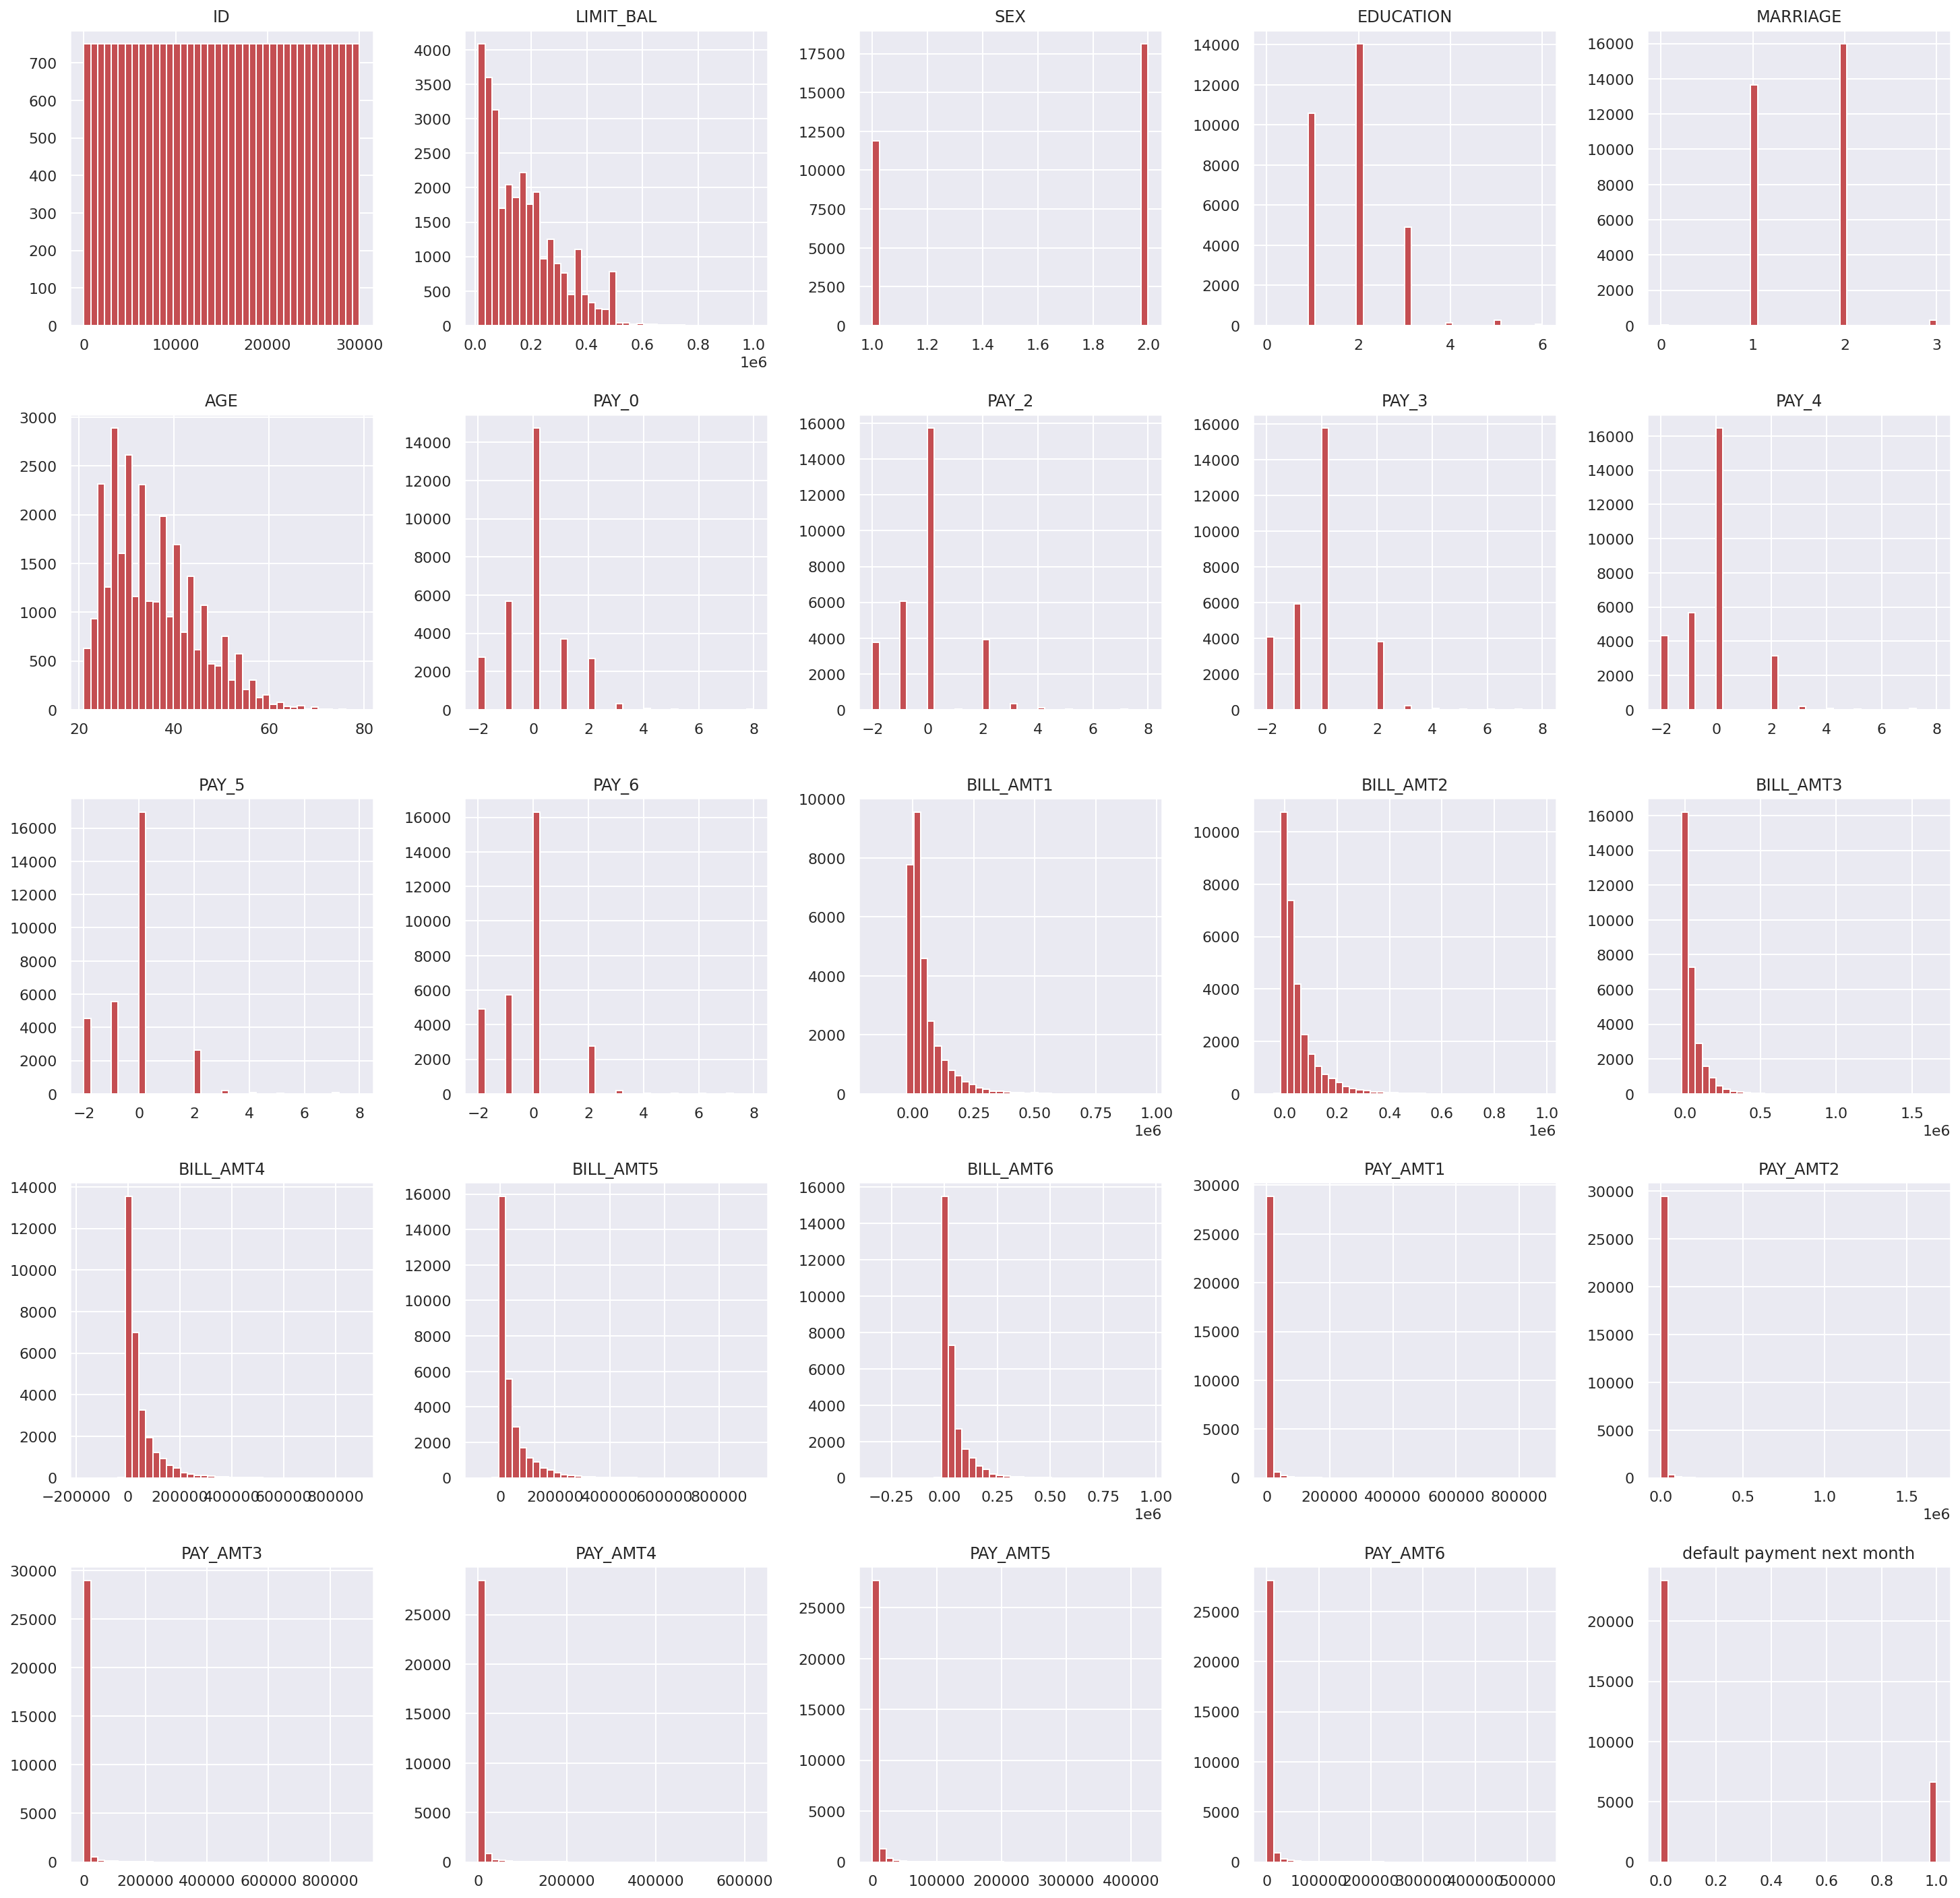

In [ ]:
df.hist(bins =40, figsize=(25,25), color='r')

In [ ]:
# creating function to plot graph with respect to default payment next month 
def plot(df, col, hue='default payment next month', hue_order=None, is_pct=True, figsize=(15,10)):
    plt.figure(figsize=figsize)
    g = sns.countplot(data=df, x=col, hue=hue, hue_order=None)
    plt.show()
    print()
    print("Percentage share of feature ")
    print(df[col].value_counts(normalize=True)*100)

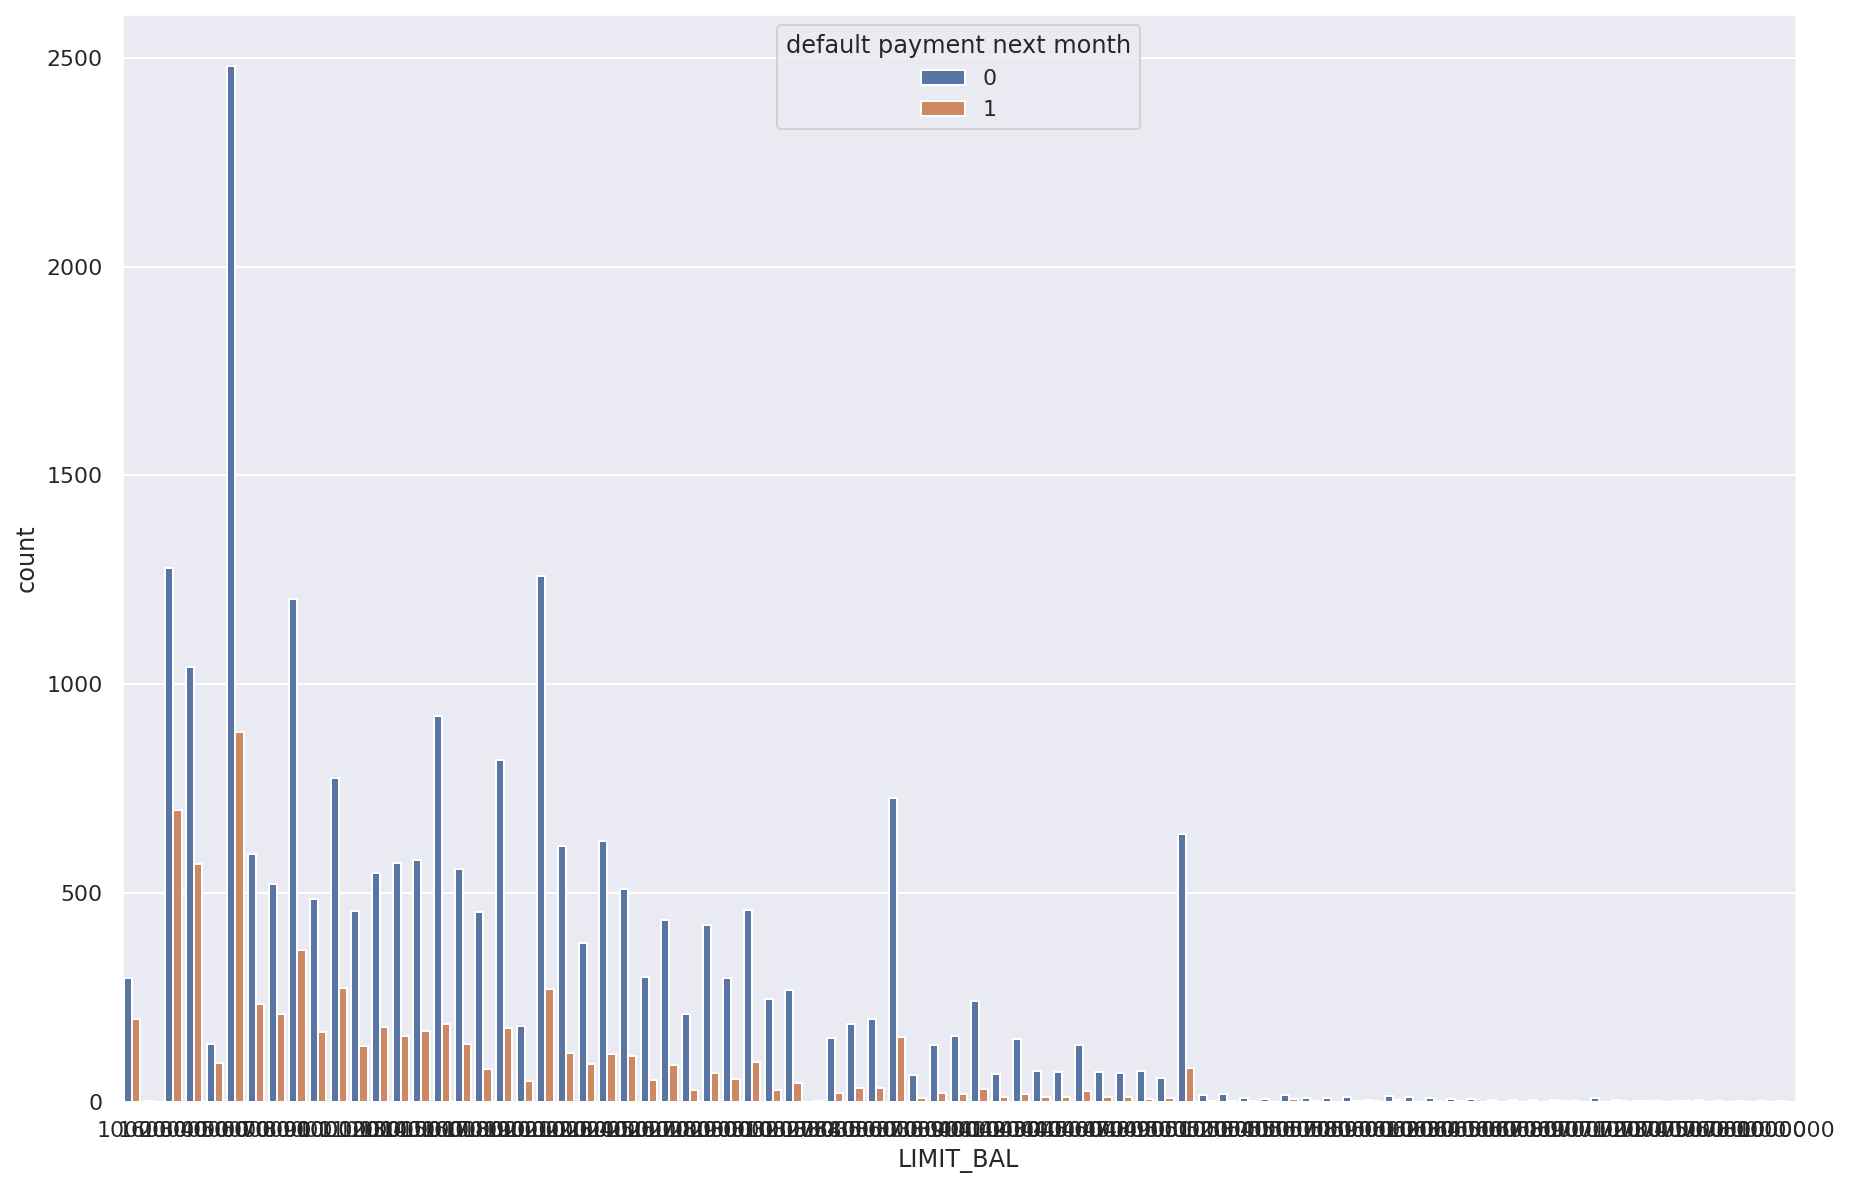


Percentage share of feature 
50000      11.216667
20000       6.586667
30000       5.366667
80000       5.223333
200000      5.093333
             ...    
730000      0.006667
1000000     0.003333
327680      0.003333
760000      0.003333
690000      0.003333
Name: LIMIT_BAL, Length: 81, dtype: float64


In [ ]:
plot(df,col="LIMIT_BAL")

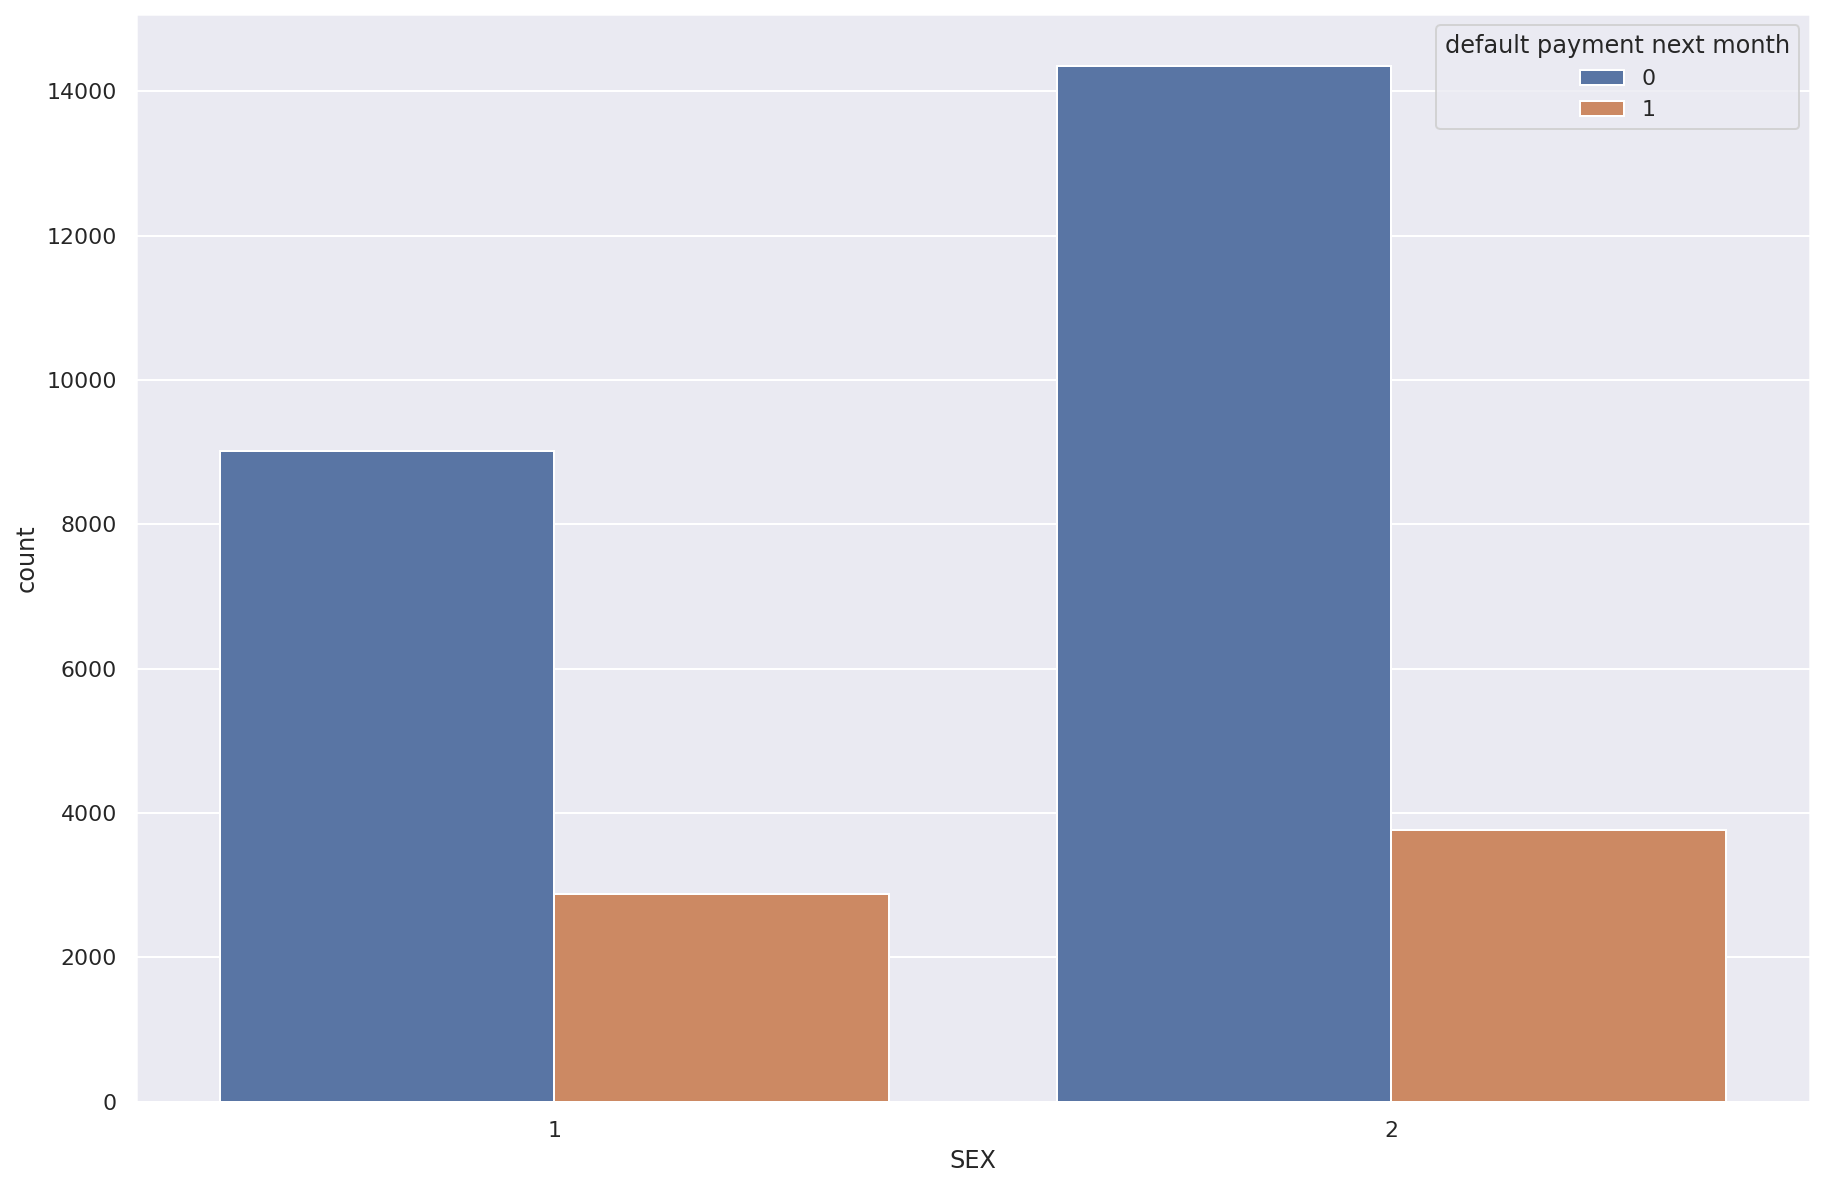


Percentage share of feature 
2    60.373333
1    39.626667
Name: SEX, dtype: float64


In [ ]:
plot(df,col="SEX")

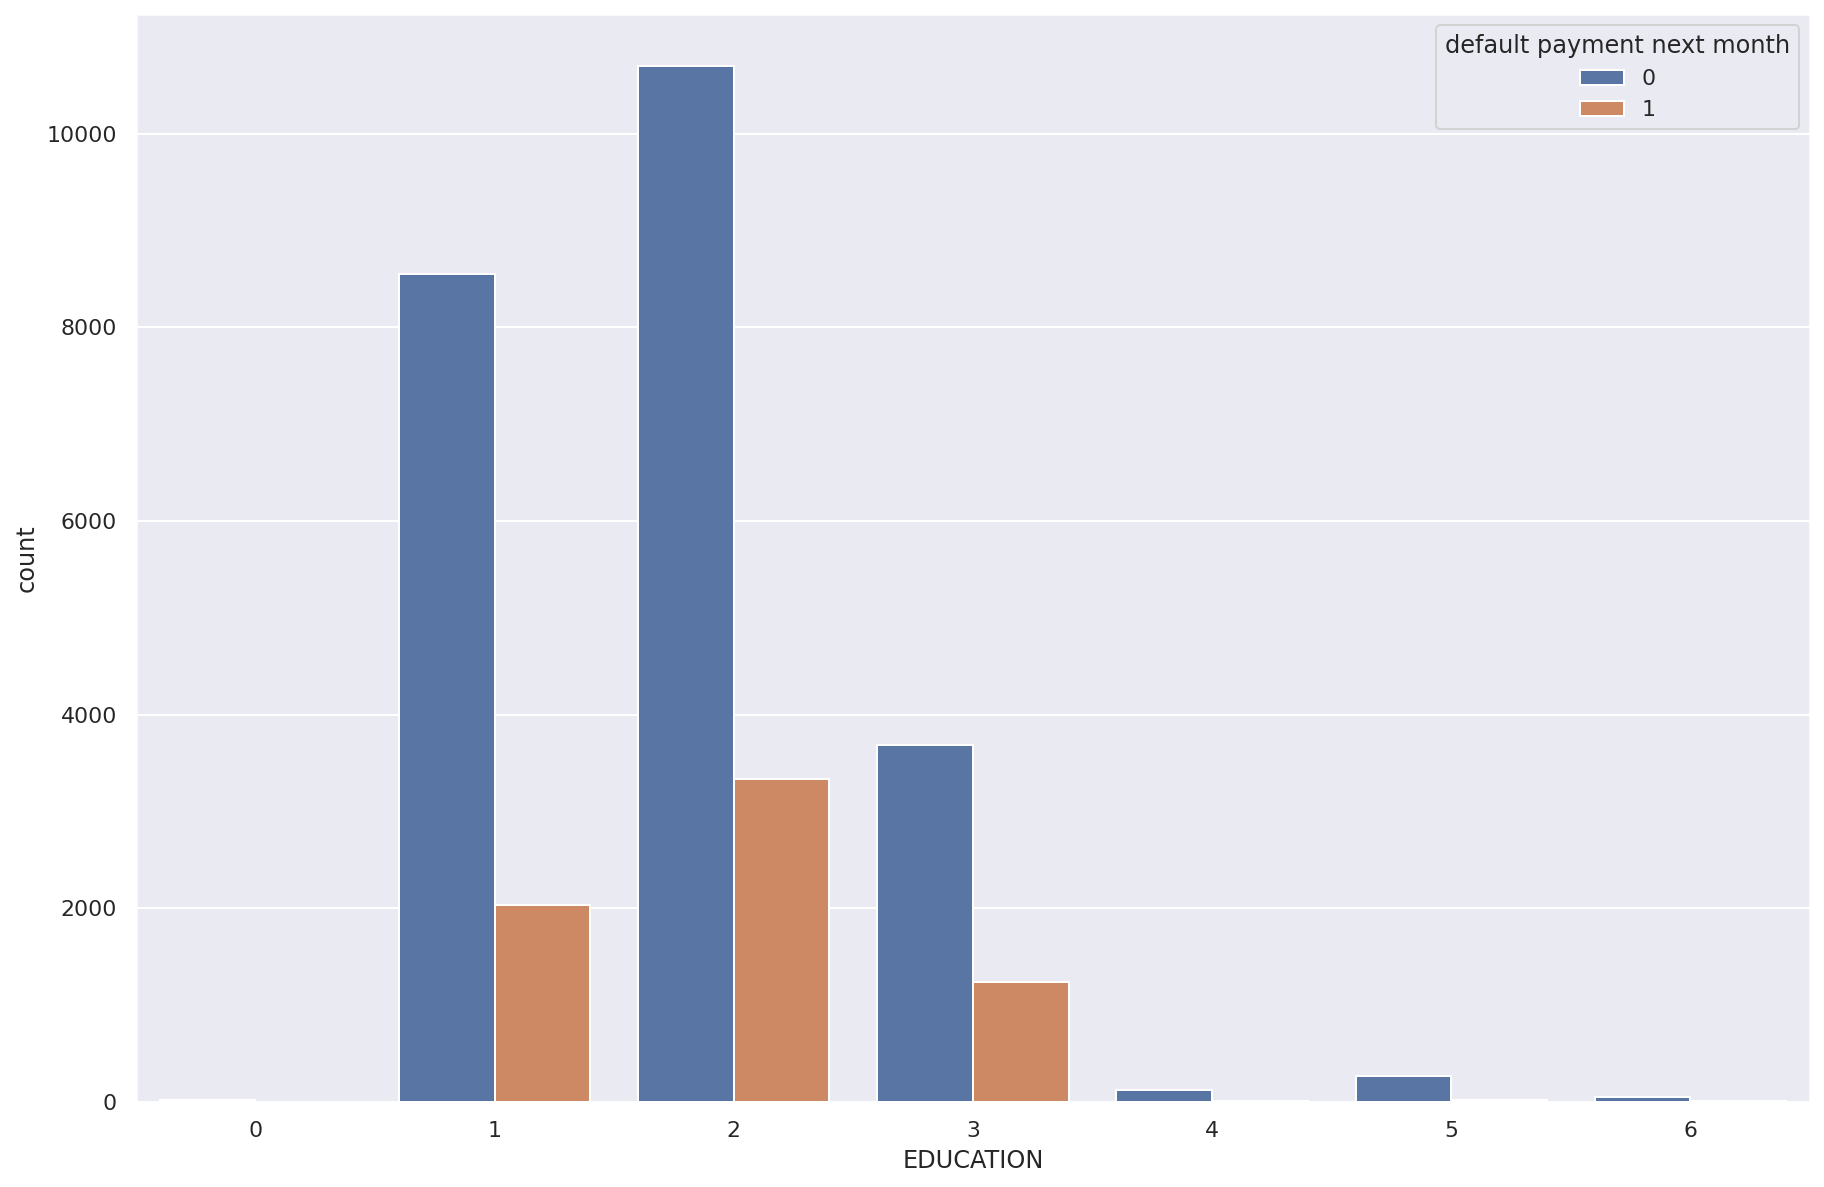


Percentage share of feature 
2    46.766667
1    35.283333
3    16.390000
5     0.933333
4     0.410000
6     0.170000
0     0.046667
Name: EDUCATION, dtype: float64


In [ ]:
plot(df,col="EDUCATION")

People who are educated (1=graduate school, 2=university, 3=high school) are more likely to default on payments.

Majority of the credit card holders are from educated population.

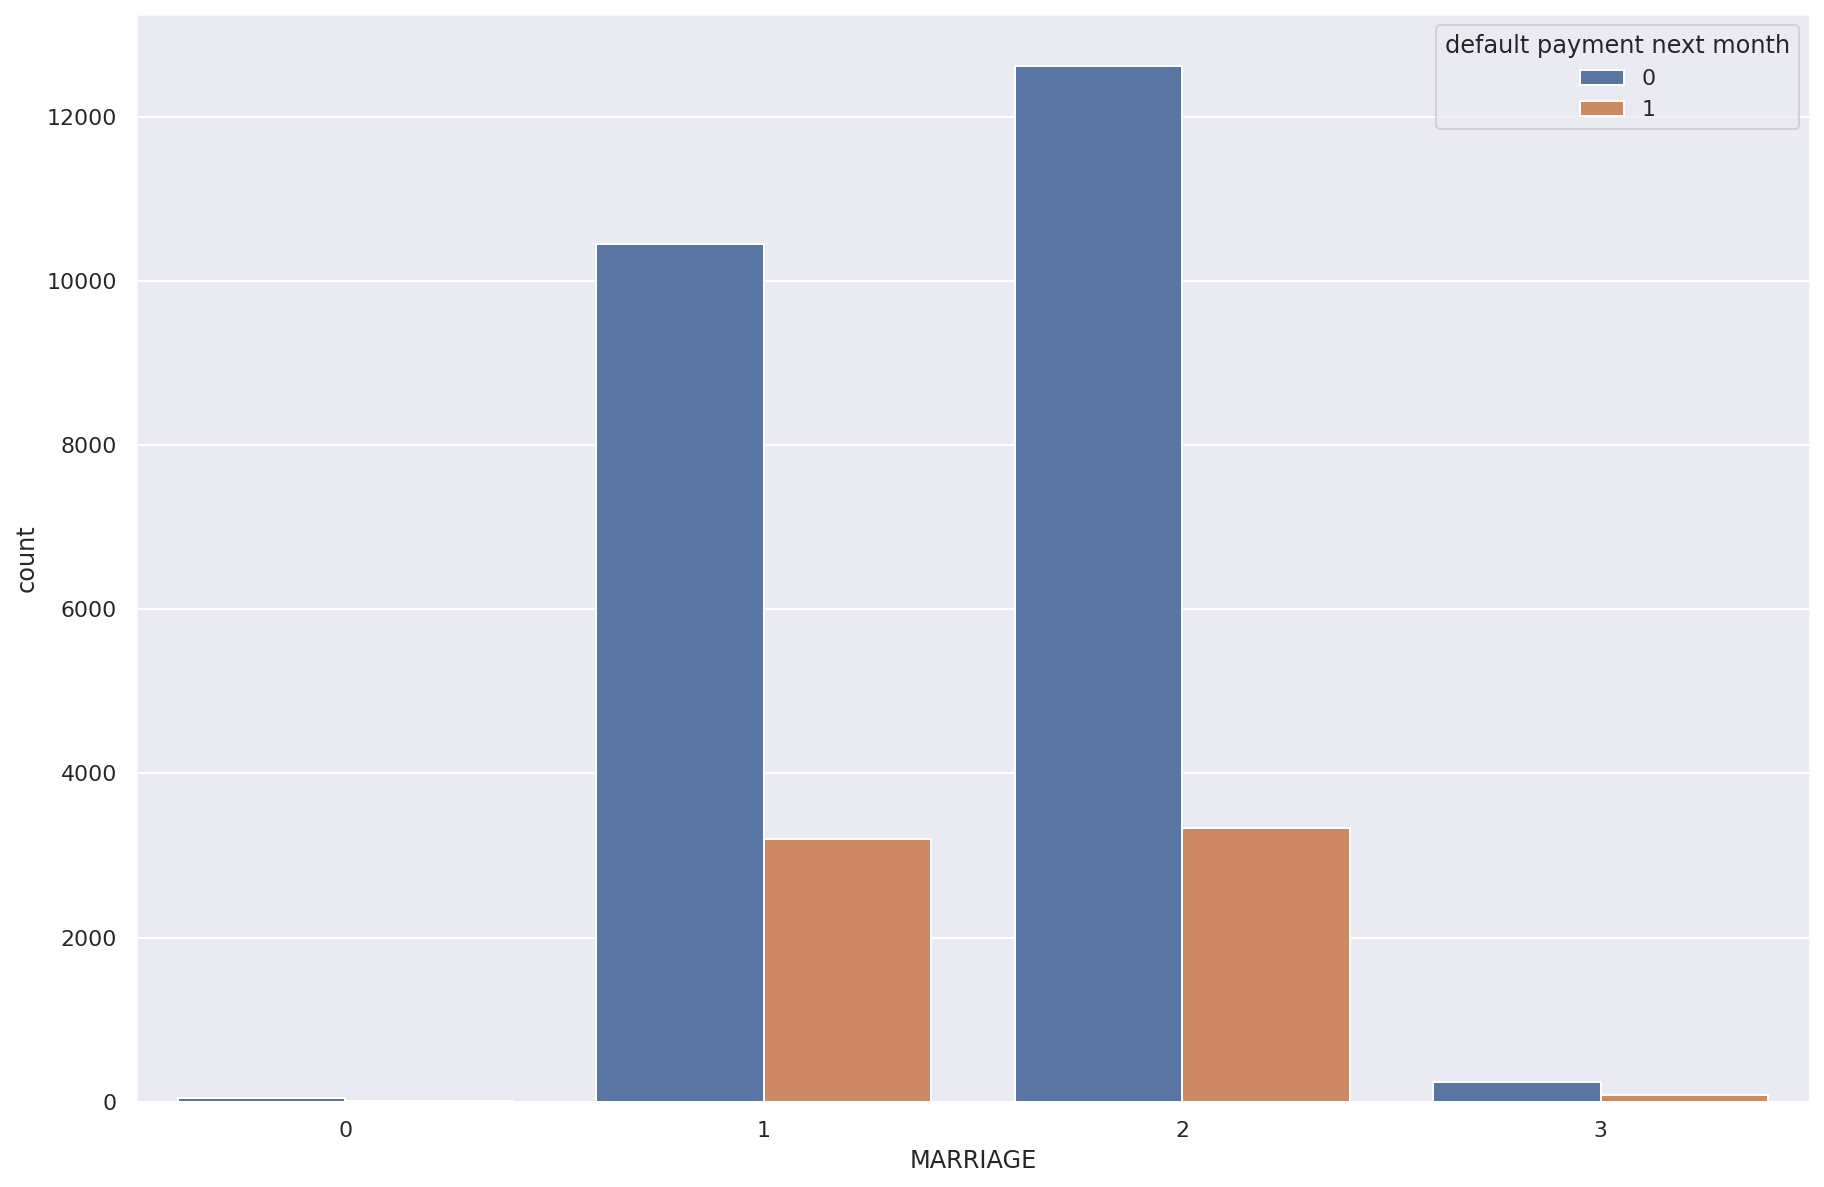


Percentage share of feature 
2    53.213333
1    45.530000
3     1.076667
0     0.180000
Name: MARRIAGE, dtype: float64


In [ ]:
plot(df,col="MARRIAGE")

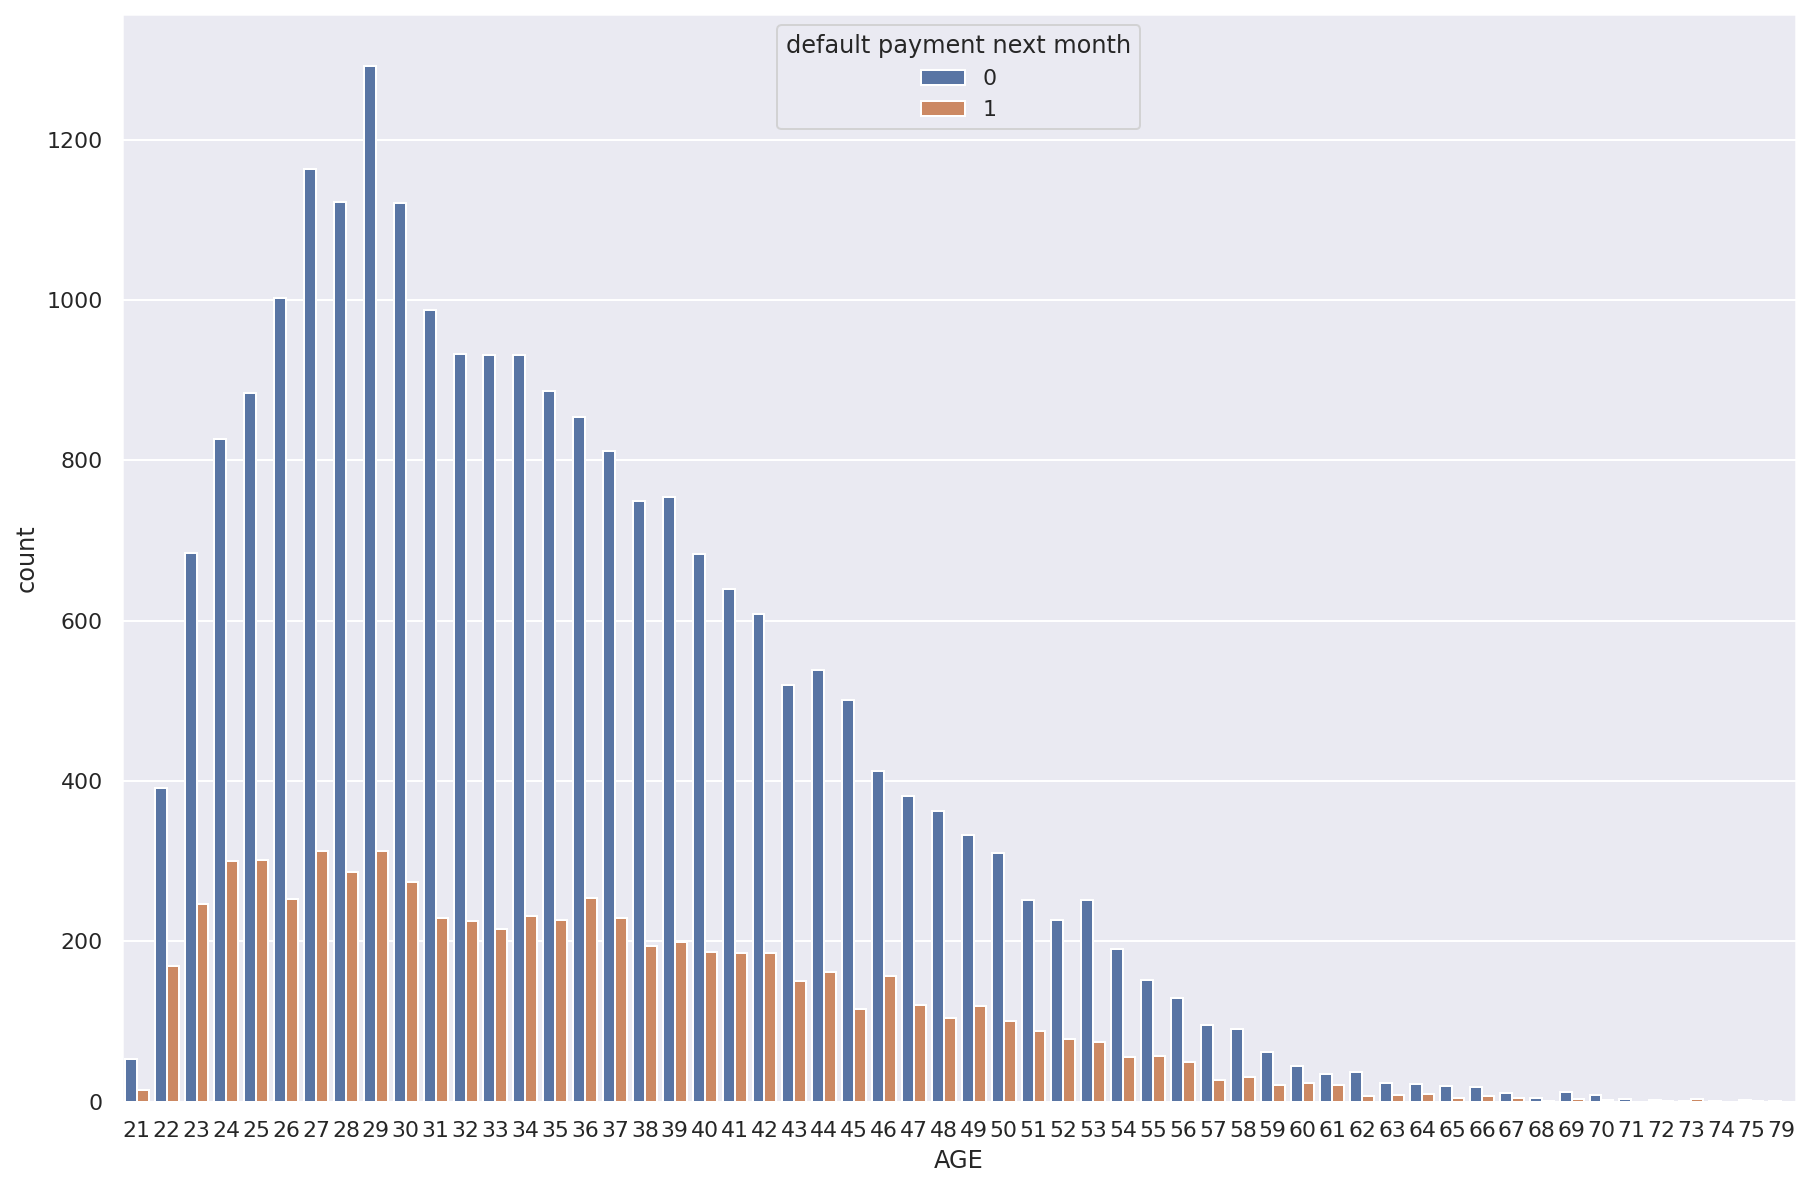


Percentage share of feature 
29    5.350000
27    4.923333
28    4.696667
30    4.650000
26    4.186667
31    4.056667
25    3.953333
34    3.873333
32    3.860000
33    3.820000
24    3.756667
35    3.710000
36    3.693333
37    3.470000
39    3.180000
38    3.146667
23    3.103333
40    2.900000
41    2.746667
42    2.646667
44    2.333333
43    2.233333
45    2.056667
46    1.900000
22    1.866667
47    1.670000
48    1.553333
49    1.506667
50    1.370000
51    1.133333
53    1.083333
52    1.013333
54    0.823333
55    0.696667
56    0.593333
58    0.406667
57    0.406667
59    0.276667
60    0.223333
21    0.223333
61    0.186667
62    0.146667
63    0.103333
64    0.103333
66    0.083333
65    0.080000
67    0.053333
69    0.050000
70    0.033333
68    0.016667
73    0.013333
72    0.010000
75    0.010000
71    0.010000
79    0.003333
74    0.003333
Name: AGE, dtype: float64


In [ ]:
plot(df,col="AGE")

 0    49.123333
-1    18.953333
 1    12.293333
-2     9.196667
 2     8.890000
 3     1.073333
 4     0.253333
 5     0.086667
 8     0.063333
 6     0.036667
 7     0.030000
Name: PAY_0, dtype: float64
 0    52.433333
-1    20.166667
 2    13.090000
-2    12.606667
 3     1.086667
 4     0.330000
 1     0.093333
 5     0.083333
 7     0.066667
 6     0.040000
 8     0.003333
Name: PAY_2, dtype: float64
 0    52.546667
-1    19.793333
-2    13.616667
 2    12.730000
 3     0.800000
 4     0.253333
 7     0.090000
 6     0.076667
 5     0.070000
 1     0.013333
 8     0.010000
Name: PAY_3, dtype: float64
 0    54.850000
-1    18.956667
-2    14.493333
 2    10.530000
 3     0.600000
 4     0.230000
 7     0.193333
 5     0.116667
 6     0.016667
 1     0.006667
 8     0.006667
Name: PAY_4, dtype: float64
 0    56.490000
-1    18.463333
-2    15.153333
 2     8.753333
 3     0.593333
 4     0.280000
 7     0.193333
 5     0.056667
 6     0.013333
 8     0.003333
Name: PAY_5, dtype: floa

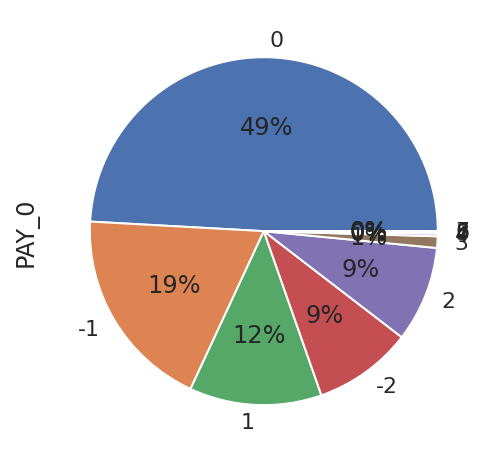

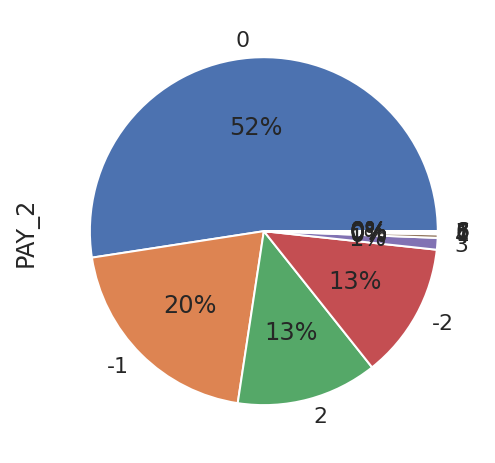

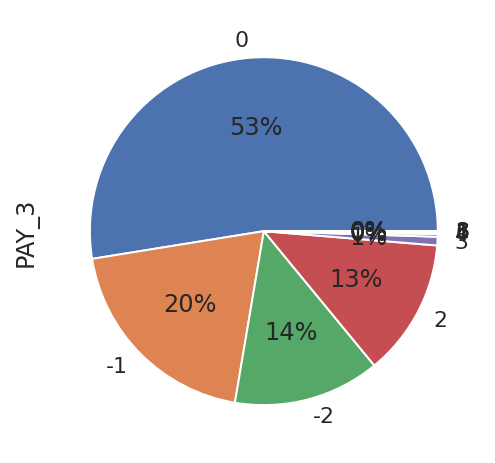

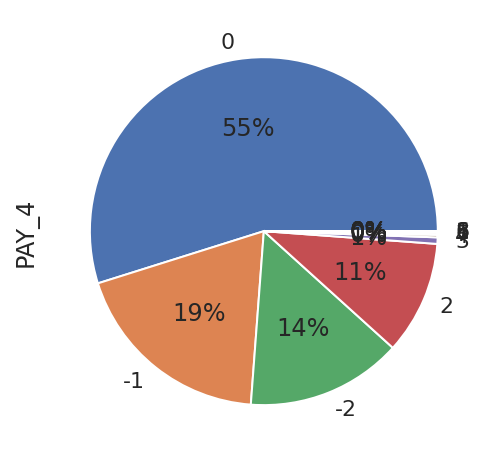

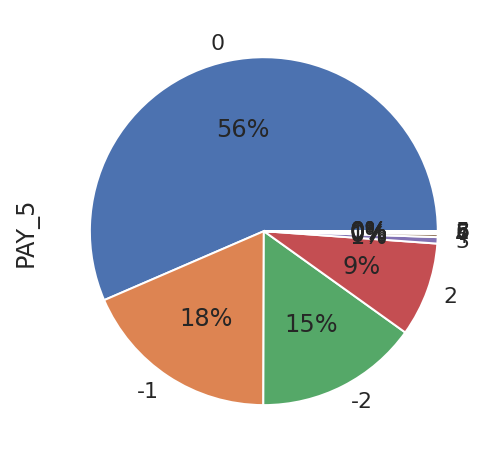

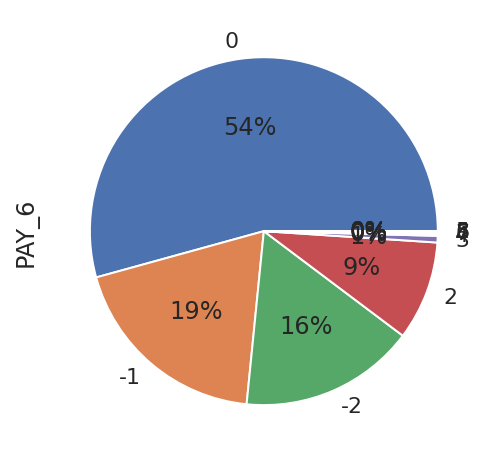

In [ ]:
print(pd.value_counts(df['PAY_0']) / len(df) * 100)
print(pd.value_counts(df['PAY_2']) / len(df) * 100)
print(pd.value_counts(df['PAY_3']) / len(df) * 100)
print(pd.value_counts(df['PAY_4']) / len(df) * 100)
print(pd.value_counts(df['PAY_5']) / len(df) * 100)
print(pd.value_counts(df['PAY_6']) / len(df) * 100)
pd.value_counts(df['PAY_0']).plot(kind='pie', y='PAY_1', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_2']).plot(kind='pie', y='PAY_2', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_3']).plot(kind='pie', y='PAY_3', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_4']).plot(kind='pie', y='PAY_4', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_5']).plot(kind='pie', y='PAY_5', autopct='%1.0f%%');
plt.show()
pd.value_counts(df['PAY_6']).plot(kind='pie', y='PAY_6', autopct='%1.0f%%');
plt.show()

Payment in past 6 months vs Bill Amount in past 6 months


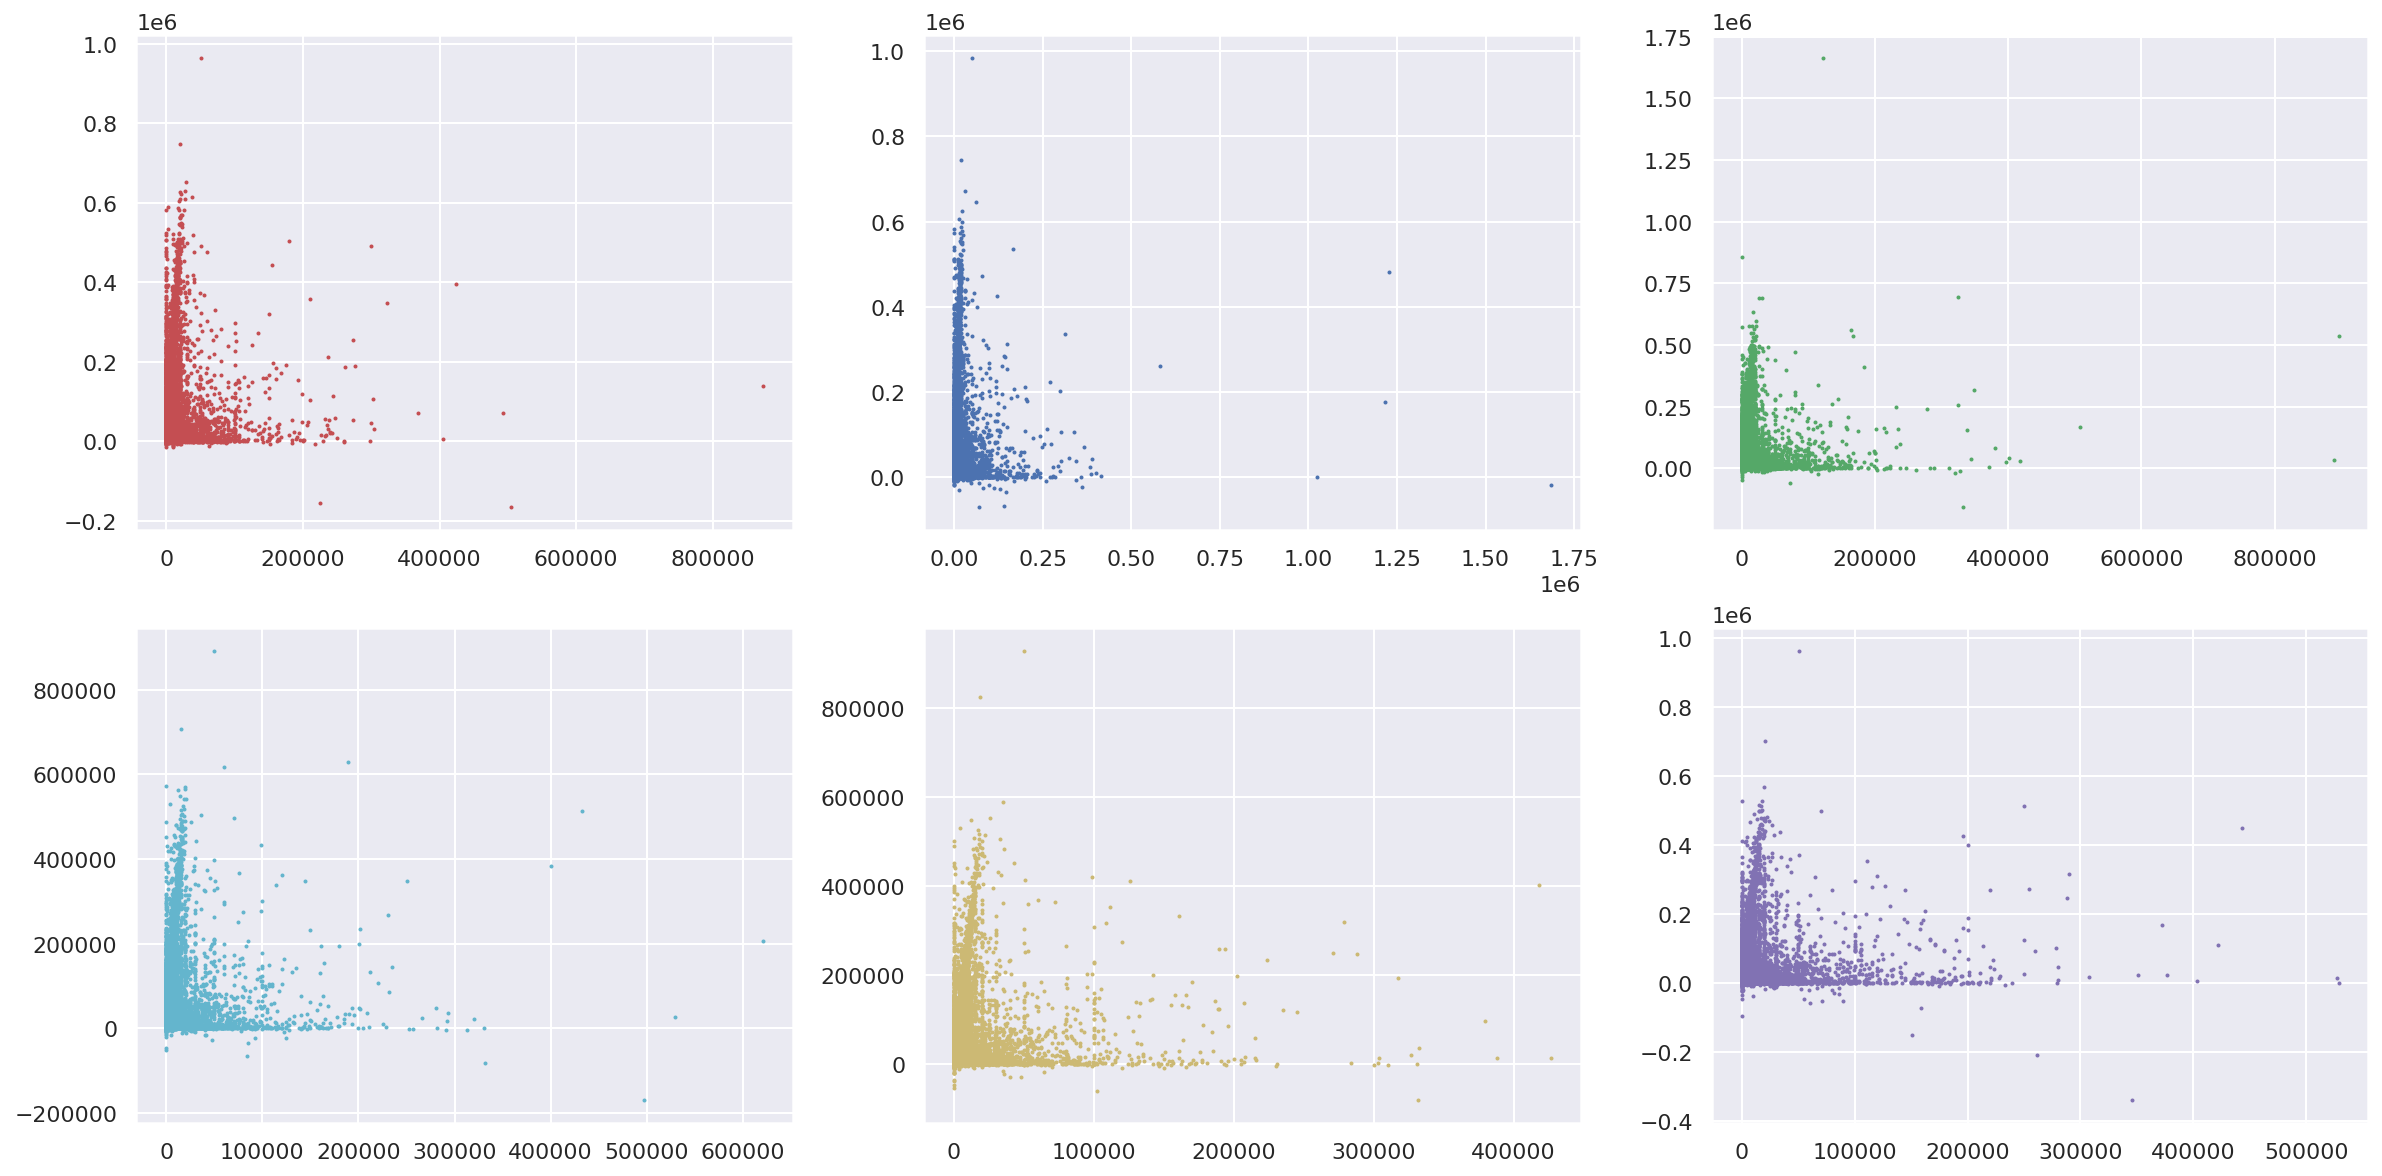

In [ ]:
#distribution pay amount vs bill amount
print("Payment in past 6 months vs Bill Amount in past 6 months")
plt.subplots(figsize=(20,10))

plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='b', s=1)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='g', s=1)

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='c', s=1)

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='y', s=1)

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)

plt.show()


** There is higher proportion of clients for whom the bill amount is high but payment done against the same is very low. **

In [ ]:
# checking for  outliers using variance inflation factor
X=df.drop(columns=['default payment next month','ID'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['feature'] = X.columns
vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values('vif')

,feature,vif
22,PAY_AMT6,1.270665
20,PAY_AMT4,1.805048
21,PAY_AMT5,1.854229
17,PAY_AMT1,1.907500
19,PAY_AMT3,1.911689
5,PAY_0,1.918276
18,PAY_AMT2,2.384860
6,PAY_2,3.211217
10,PAY_6,3.463800
7,PAY_3,3.727427


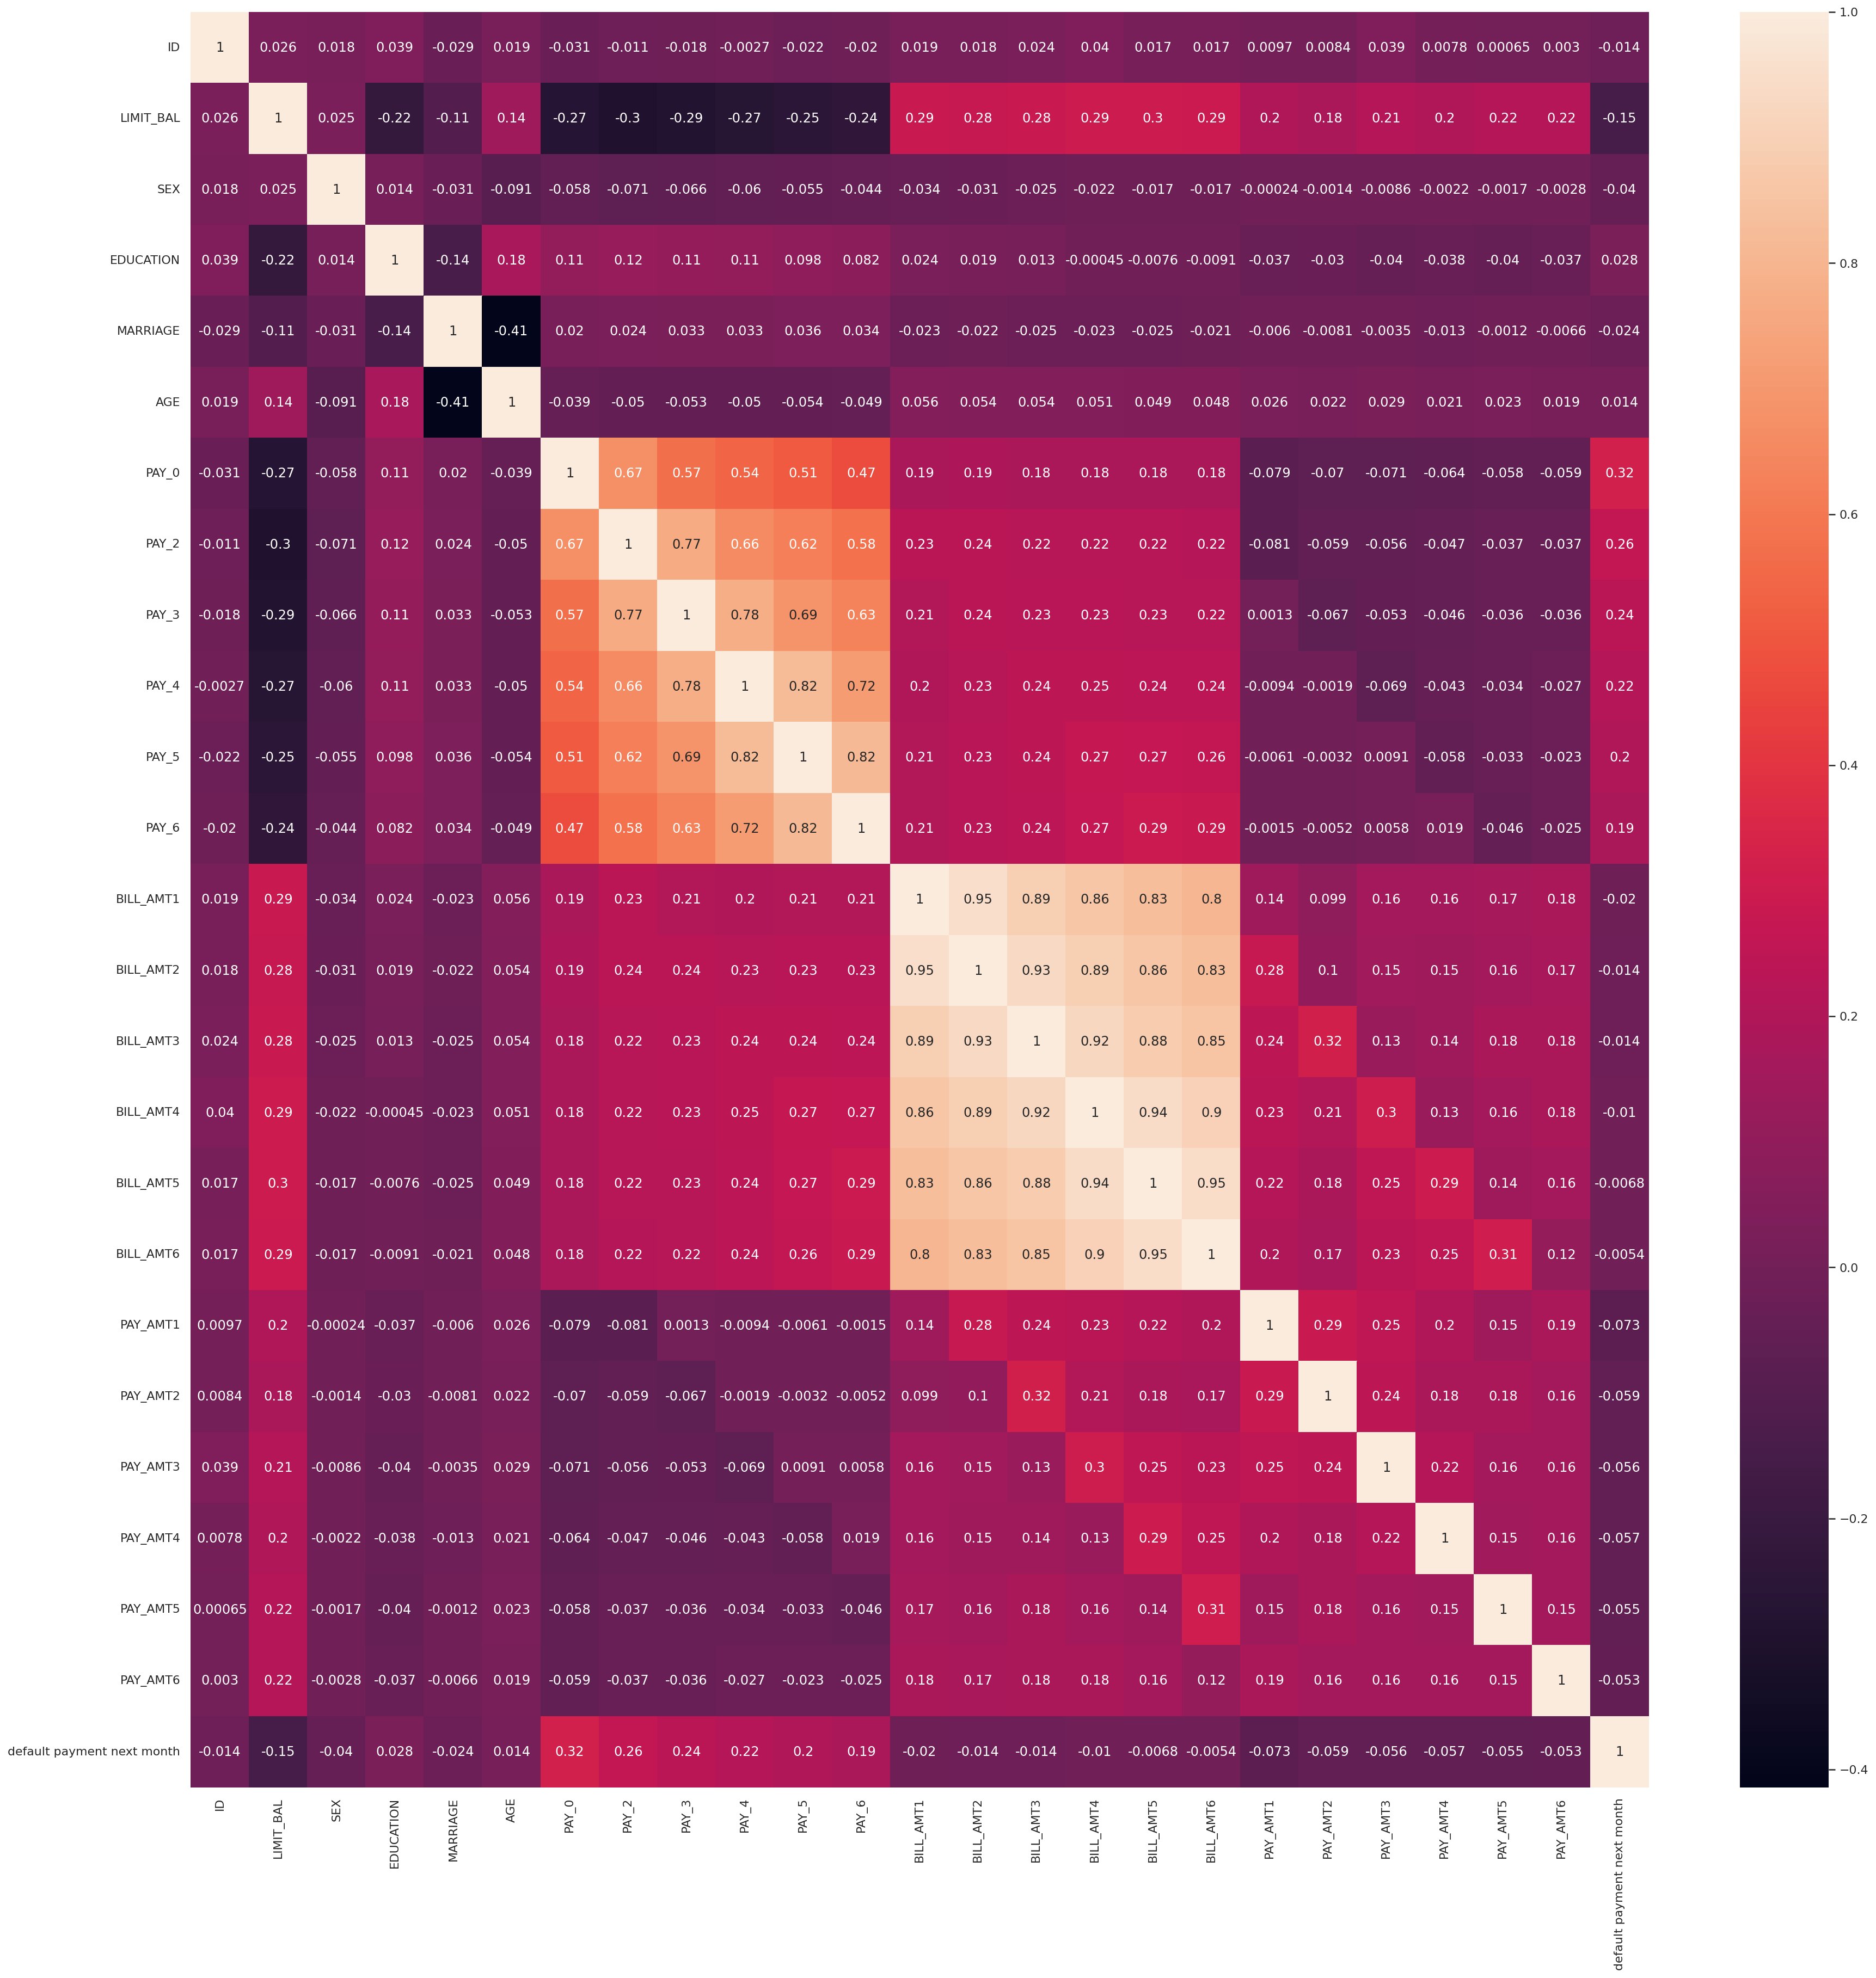

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, annot = True)

** Looking at above correlation heatmap, we can see following observations: **
1. BILL_AMT1 to BILL_AMT6 are highly correlated with each other.
2. There also seems some sort of correlation between "BILL_AMT and PAY_AMT", ans also between "BILL_AMT and PAY_".
3. There is NOT considerable correlation betweem "PAY_AMT amd PAY_"

Individually, "PAY", "BILL_AMT" and "PAY_AMT" has high correlation among there 6 month's observation.
So, we will keep only one observation from each of there groups by adding other with respective group of it

For simplicity and generality, lets keep TOTAL_PAY_1, TOTAL_BILL_AMT1 and TOTAL_PAY_AMT1 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text major ticklabel objects>)

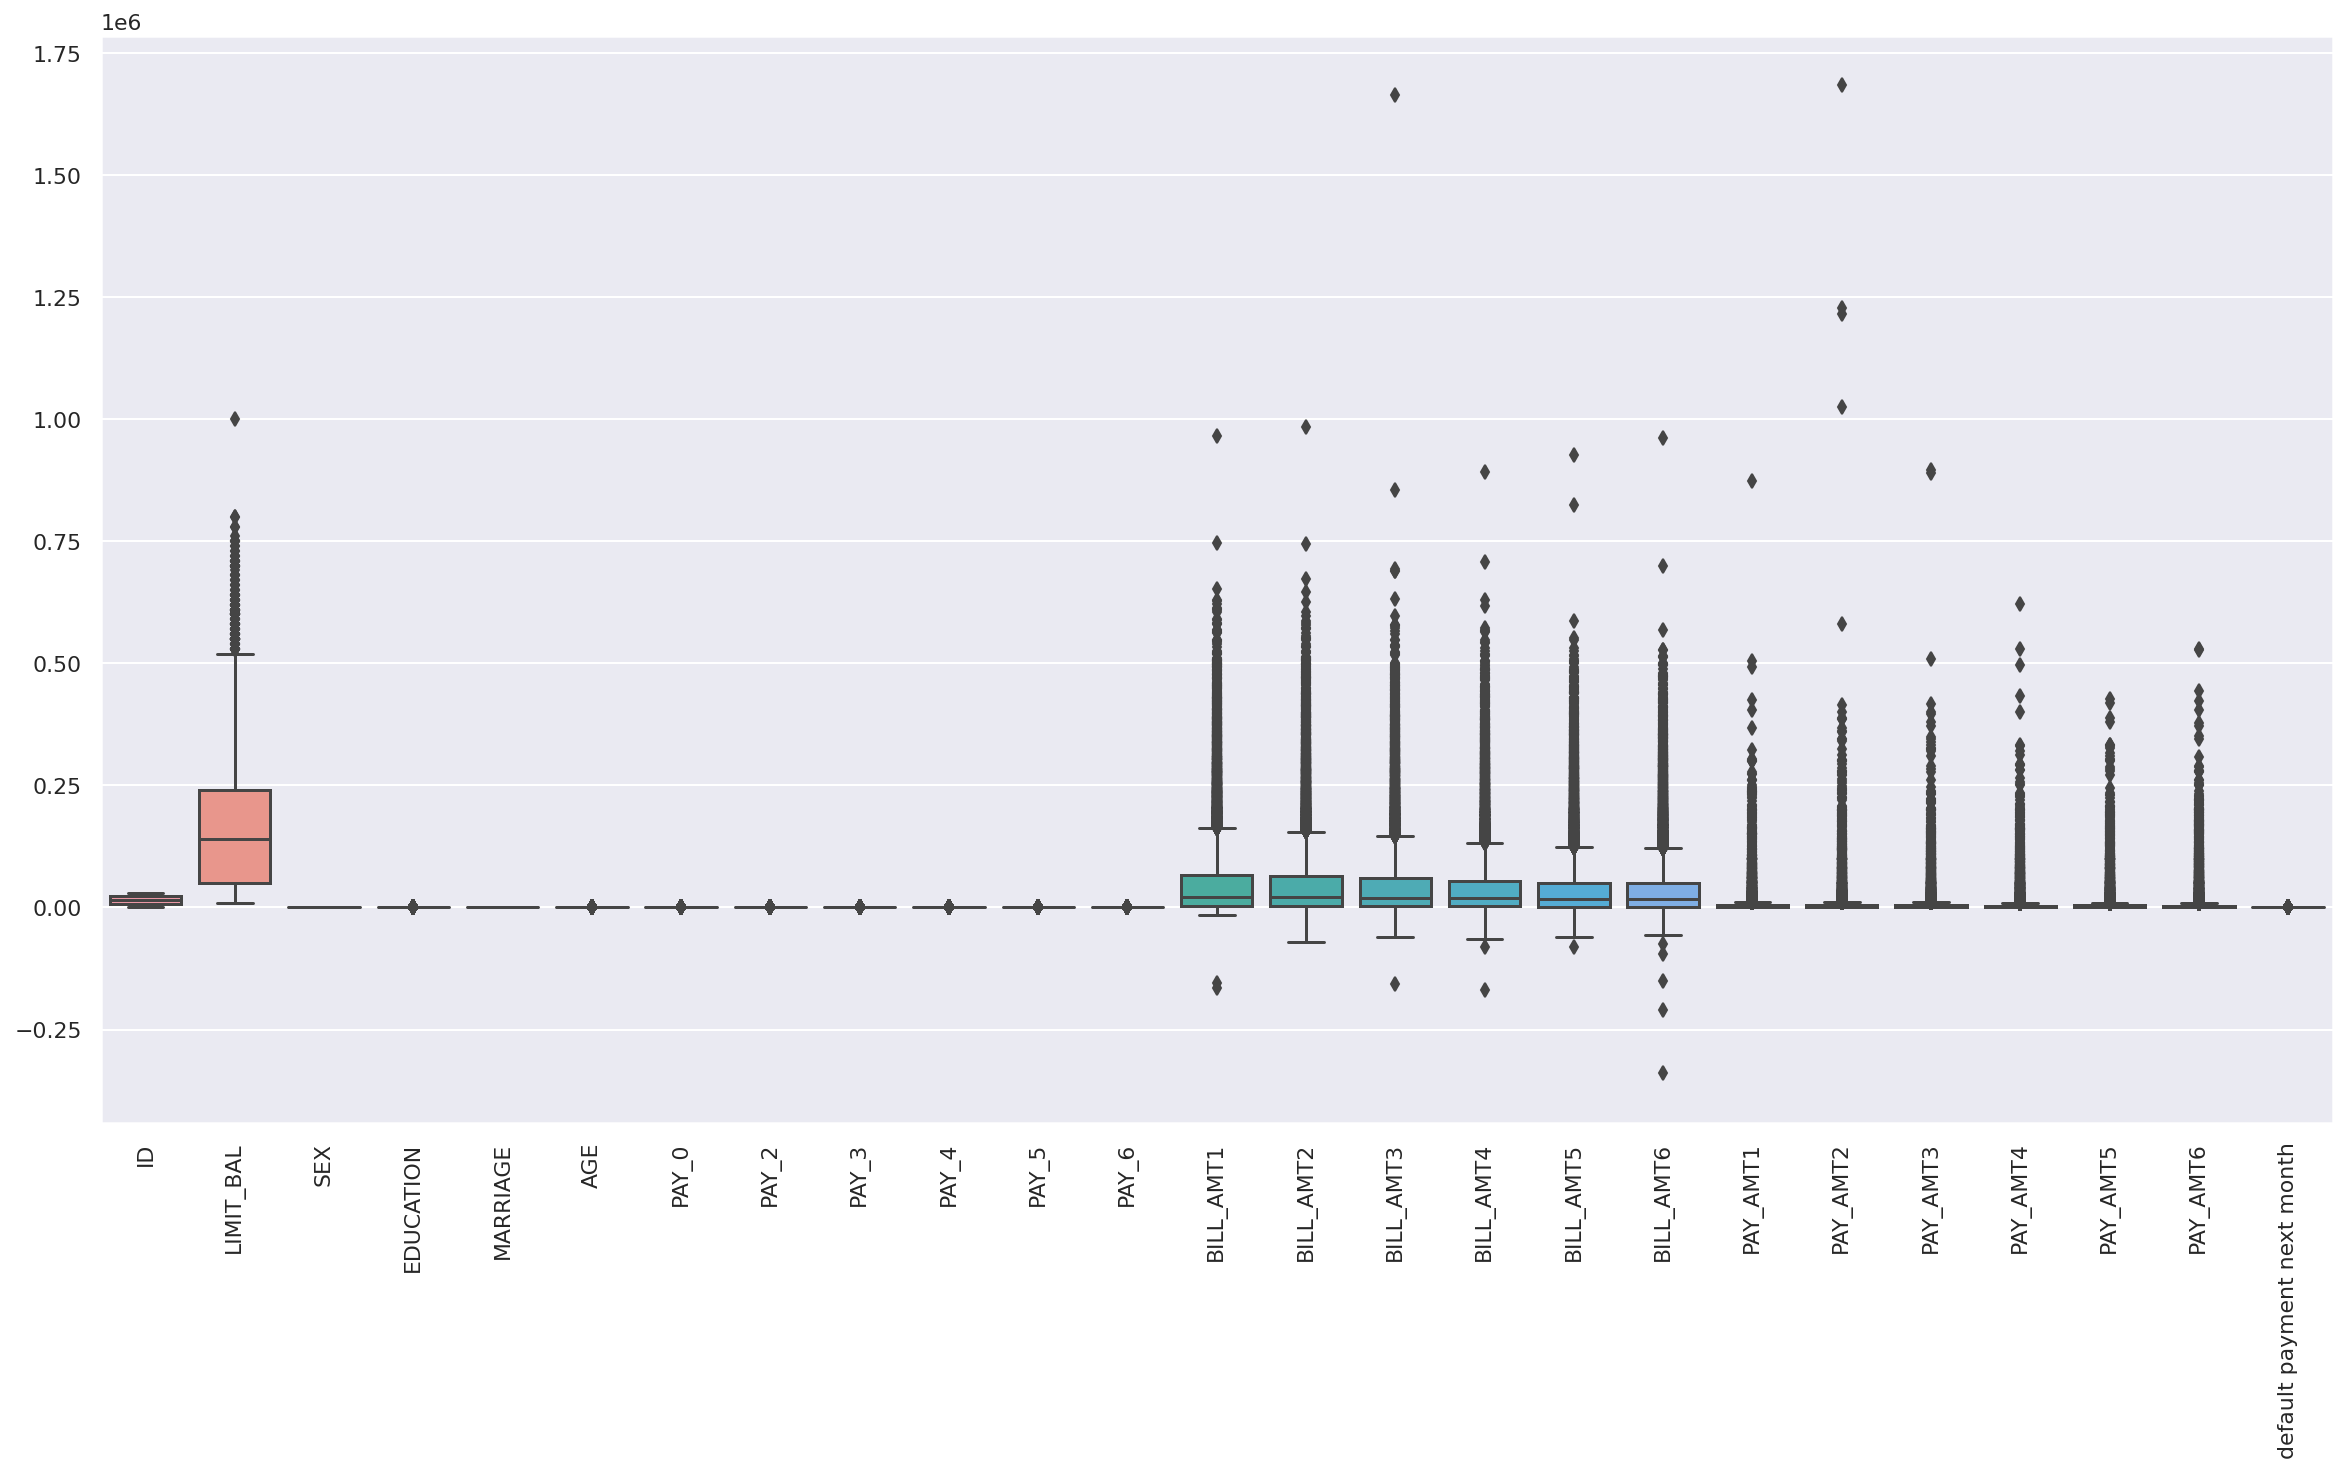

In [ ]:
# checking for outliers
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation = 90)

from above data we can observe that in bILL AMT and PAY ATM has the outliers data, which should be treated in order to decrease the complexity and weightage towards the model effiency


In [3]:
continuous_variable = ['LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

# treating the outliers.
creating function to clear the outliers data with respect to quantile

In [4]:
def cap_data(df):
    for col in continuous_variable:
        print("done with ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            Q1 = np.percentile(df[col],25,interpolation = 'midpoint')
            Q3 = np.percentile(df[col],75,interpolation = 'midpoint')
            IQR = Q3 - Q1
            upper = Q3 +1.5*IQR
            lower = Q1 - 1.5*IQR
    
            percentiles = df[col].quantile([0.25,0.75]).values
            df[col][df[col] <= lower] = lower
            df[col][df[col] >= upper] = upper
        else:
            df[col]=df[col]
    return df

final_df_IQR=cap_data(df).copy()

done with  LIMIT_BAL
done with  BILL_AMT1
done with  BILL_AMT2
done with  BILL_AMT3
done with  BILL_AMT4
done with  BILL_AMT5
done with  BILL_AMT6
done with  PAY_AMT1
done with  PAY_AMT2
done with  PAY_AMT3
done with  PAY_AMT4
done with  PAY_AMT5
done with  PAY_AMT6


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykern

Text(0.5, 1.0, 'Original Data')

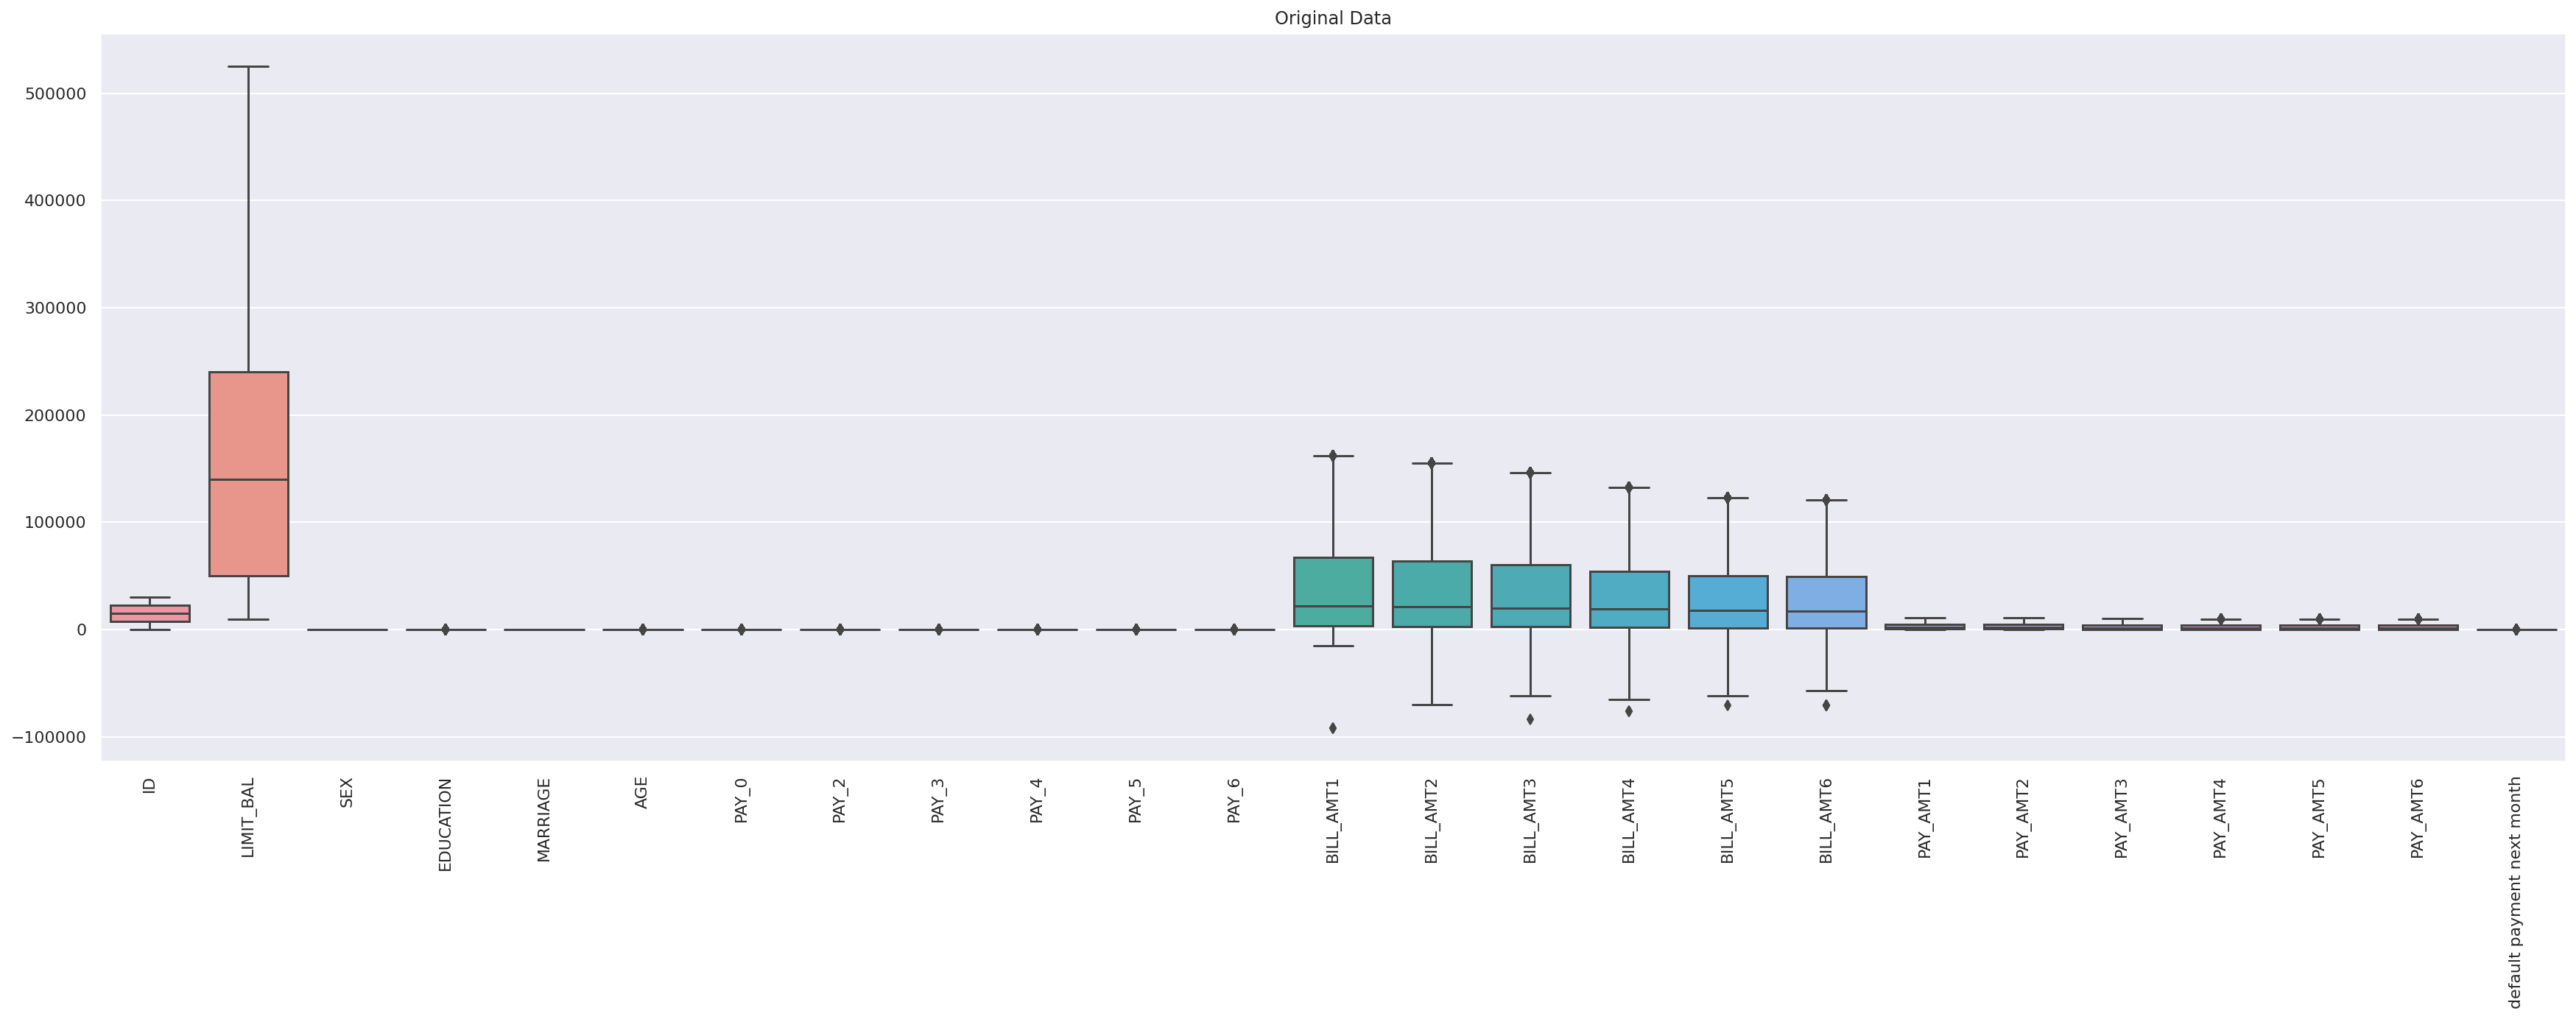

In [ ]:
# data after treating outliers 
plt.figure(figsize=(30,20))
plt.subplot(2, 1, 1)
sns.boxplot(data=final_df_IQR)
plt.xticks(rotation = 90)
plt.title('Original Data')

# SMOTE (synthetic minority oversampling technique) 

In our data set we have  Imbalanced Data Distribution in our dependent variable, it  generally happens when observations in one of the class are much higher i.e not defaulter or lower than the other classes i.e defaulter.

Standard ML techniques such as Decision Tree and Logistic Regression have a bias towards the majority class, and they tend to ignore the minority class. They tend only to predict the majority class, hence, having major misclassification of the minority class in comparison with the majority class. In more technical words, if we have imbalanced data distribution in our dataset then our model becomes more prone to the case when the minority class has a negligible or very lesser recall.***
 
##SMOTE

smote is one of the most commonly used oversampling methods to solve the imbalance problem. It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [5]:
#import the module 

from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['default payment next month'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

columns = list(df.columns)

df = pd.DataFrame(x_smote, columns=columns)

df['default payment next month'] = y_smote

Original dataset shape 30000
Resampled dataset shape 46728


In [6]:
# to reduce multicolinearty we have two options whether to drop or add together and i decided to add
final_df_IQR["TOTAL_BILL_AMT1"] = df["BILL_AMT1"] + df["BILL_AMT2"]+ df["BILL_AMT3"]+ df["BILL_AMT4"]+ df["BILL_AMT5"]+ df["BILL_AMT6"]
final_df_IQR["TOTAL_PAY_AMT1"] = df["PAY_AMT1"] +df["PAY_AMT2"] +df["PAY_AMT3"] +df["PAY_AMT4"] +df["PAY_AMT5"] +df["PAY_AMT6"]
final_df_IQR["TOTAL_PAY"] = df["PAY_0"] +df["PAY_2"] +df["PAY_3"] +df["PAY_4"] +df["PAY_5"] +df["PAY_6"]


In [7]:
# data after handling outliers and multicolinearty
final= final_df_IQR[["LIMIT_BAL","TOTAL_PAY","TOTAL_BILL_AMT1","TOTAL_PAY_AMT1","SEX","AGE","LIMIT_BAL","EDUCATION","MARRIAGE","default payment next month"]].copy()
final

,LIMIT_BAL,TOTAL_PAY,TOTAL_BILL_AMT1,TOTAL_PAY_AMT1,SEX,AGE,LIMIT_BAL,EDUCATION,MARRIAGE,default payment next month
0,20000,-2,7704.00,689.0,2,24,20000,2,1,1
1,120000,3,17077.00,5000.0,2,26,120000,2,2,1
2,90000,0,101653.00,11018.0,2,34,90000,2,2,0
3,50000,0,231334.00,8388.0,2,37,50000,2,1,0
4,50000,-2,109339.00,33618.5,1,57,50000,2,1,0
...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,599573.25,33800.5,1,39,220000,3,1,0
29996,150000,-4,21182.00,14490.0,1,43,150000,3,2,0
29997,30000,8,70496.00,19977.5,1,37,30000,2,2,1
29998,80000,-1,266611.00,29034.0,1,41,80000,3,1,1


# MODELLING

## Logistic regression: 
Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. 

## random forest classifier:
Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees

## gradient boosting classifiers:
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting


## Decision tree clasiifier:
A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements

## support Vector Classifier:
The Linear Support Vector Classifier (SVC) method applies a linear kernel function to perform classification and it performs well with a large number of samples. If we compare it with the SVC model, the Linear SVC has additional parameters such as penalty normalization which applies 'L1' or 'L2' and loss function.

## GridSearchCV
GridSearchCV is a library function that is a member of sklearn's model_selection package. It helps to loop through predefined hyperparameters and fit our estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

seed=42
lr=LogisticRegression (random_state=seed)
rfc=RandomForestClassifier(random_state=seed)
gbc= GradientBoostingClassifier(random_state=seed)
dtc = DecisionTreeClassifier(random_state=seed)
svc= SVC(random_state=seed)
models=[lr,rfc,gbc,dtc,svc]


In [9]:
#defining function for both base model and hyper tuning model(girdsearchcv) with respect to Logistic regression, random forest classifier,
#gradient boosting classifier,  Decision tree clasiifier, and support Vector Classifier.
class model:
    def base_model():    
        for model in models:
            model.fit(X_train, Y_train)
            Y_pred_train = model.predict(X_train)
            Y_pred_validation= model.predict(X_test)
            print("**************************")
            print(model)
            acc = accuracy_score(Y_test, Y_pred_validation)
            print('Accuracy: %.2f%%'%(acc*100))
            print( classification_report(Y_test, model.predict(X_test)))
            plot_confusion_matrix(model, X_test, Y_test, cmap="Blues_r")
            plt.show()
            print('============================')
            print(" ")
 
    # GridSearchCV Logistic regression
    def grid_LogisticRegression():
        param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
        grid_lr = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
        grid_lr.fit(X_train, Y_train)  
        optimized_lr = grid_lr.best_estimator_
        print(optimized_lr)
        print(grid_lr.best_params_)
        train_class_preds = optimized_lr.predict(X_train)
        test_class_preds = optimized_lr.predict(X_test)
        train_accuracy_lr = accuracy_score(train_class_preds,Y_train)
        test_accuracy_lr = accuracy_score(test_class_preds,Y_test)  
        print("The accuracy on train data is ", train_accuracy_lr)
        print("The accuracy on test data is ", test_accuracy_lr)
        print( classification_report(Y_test, optimized_lr.predict(X_test)))
        plot_confusion_matrix(optimized_lr, X_test, Y_test, cmap="Blues_r")
        plt.show()

    # GridSearchCV random forest classifier
    def grid_randomforestregression():
        param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}
        grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
        grid_rfc.fit(X_train, Y_train)
        optimized_rfc = grid_rfc.best_estimator_
        print(optimized_rfc)
        print(grid_rfc.best_params_)
        train_class_preds = optimized_rfc.predict(X_train)
        test_class_preds = optimized_rfc.predict(X_test)
        train_accuracy_rfc = accuracy_score(train_class_preds,Y_train)
        test_accuracy_rfc= accuracy_score(test_class_preds,Y_test)
        print("The accuracy on train data is ", train_accuracy_rfc)
        print("The accuracy on test data is ", test_accuracy_rfc)
        print( classification_report(Y_test, optimized_rfc.predict(X_test)))
        plot_confusion_matrix(optimized_rfc, X_test, Y_test, cmap="Blues_r")
        plt.show()

    # GridSearchCV gradient boosting classifier
    def grid_GradientBoostingClassifier():
        param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}
        grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
        grid_gbc.fit(X_train, Y_train)
        optimized_gbc= grid_gbc.best_estimator_
        print(optimized_gbc)
        print(grid_gbc.best_params_)
        train_class_preds = optimized_gbc.predict(X_train)
        test_class_preds = optimized_gbc.predict(X_test)
        train_accuracy_gbc = accuracy_score(train_class_preds,Y_train)
        test_accuracy_gbc= accuracy_score(test_class_preds,Y_test)
        print("The accuracy on train data is ", train_accuracy_gbc)
        print("The accuracy on test data is ", test_accuracy_gbc)
        print( classification_report(Y_test, optimized_gbc.predict(X_test)))
        plot_confusion_matrix(optimized_gbc, X_test, Y_test, cmap="Blues_r")
        plt.show()
    
     # GridSearchCV Decision tree clasiifier
    def grid_DecisionTreeClassifier():
        grid_values = {'max_depth': list(range(2, 10)),'splitter' : ['best','random']}
        grid_dtc= GridSearchCV(DecisionTreeClassifier(), grid_values, verbose=1, cv=5 ,scoring='accuracy')
        grid_dtc.fit(X_train, Y_train) 
        optimized_dtc= grid_dtc.best_estimator_
        print(optimized_dtc)
        print(grid_dtc.best_params_)
        train_class_preds = optimized_dtc.predict(X_train)
        test_class_preds = optimized_dtc.predict(X_test)
        train_accuracy_dtc = accuracy_score(train_class_preds,Y_train)
        test_accuracy_dtc= accuracy_score(test_class_preds,Y_test)
        print("The accuracy on train data is ", train_accuracy_dtc)
        print("The accuracy on test data is ", test_accuracy_dtc)
        print( classification_report(Y_test, optimized_dtc.predict(X_test)))
        plot_confusion_matrix(optimized_dtc, X_test, Y_test, cmap="Blues_r")
        plt.show()

    # GridSearchCV support Vector Classifier
    def grid_supportvectorclassifier():
        print("Support Vector Classifier")
        param_grid = {'C': [0.1, 1, 10, 100, 1000],'kernel': ['rbf']} 
        grid_svc = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
        grid_svc.fit(X_train, Y_train)
        optimized_svc= grid_svc.best_estimator_
        print(grid_svc.best_params_)
        train_class_preds = optimized_svc.predict(X_train)
        test_class_preds = optimized_svc.predict(X_test)
        train_accuracy_svc = accuracy_score(train_class_preds,Y_train)
        test_accuracy_svc= accuracy_score(test_class_preds,Y_test)
        print("The accuracy on train data is ", train_accuracy_svc)
        print("The accuracy on test data is ", test_accuracy_svc)
        print( classification_report(Y_test, optimized_svc.predict(X_test)))
        plot_confusion_matrix(optimized_svc, X_test, Y_test, cmap="Blues_r")
        plt.show()
       


# SCENARIO:



# SCENARIO 1: Data With basic EDA


In [10]:
# data with basic data wrangling
x=df.drop(['ID','default payment next month'], axis=1)
y=df['default payment next month']
X_train, X_test, Y_train, Y_test = train_test_split( x,y , test_size = 0.2, random_state = 1000) 
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(37382, 23)
(9346, 23)


**************************
LogisticRegression(random_state=42)
Accuracy: 73.26%
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      4681
           1       0.73      0.74      0.73      4665

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346



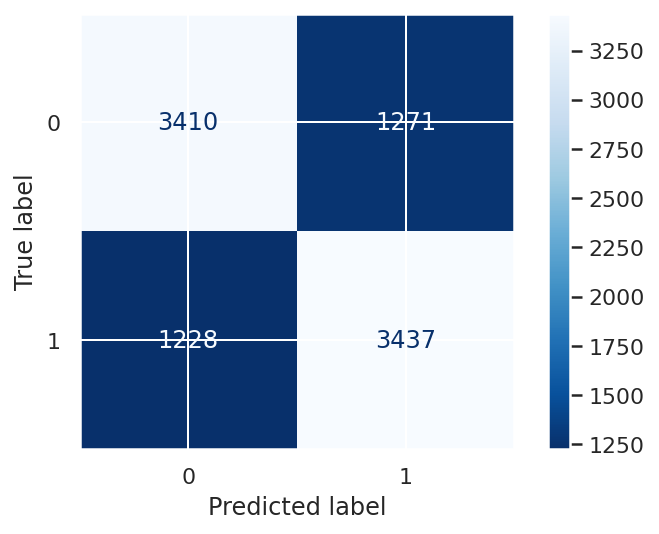

 
**************************
RandomForestClassifier(random_state=42)
Accuracy: 84.65%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4681
           1       0.86      0.82      0.84      4665

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



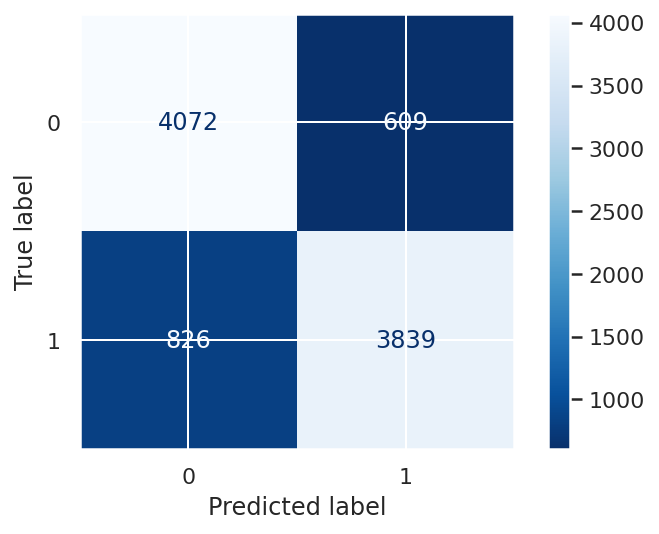

 
**************************
GradientBoostingClassifier(random_state=42)
Accuracy: 79.18%
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      4681
           1       0.81      0.76      0.78      4665

    accuracy                           0.79      9346
   macro avg       0.79      0.79      0.79      9346
weighted avg       0.79      0.79      0.79      9346



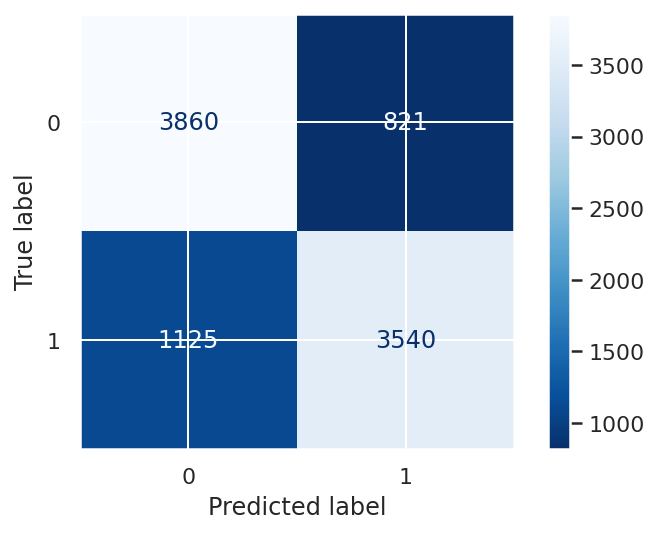

 
**************************
DecisionTreeClassifier(random_state=42)
Accuracy: 75.40%
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      4681
           1       0.75      0.77      0.76      4665

    accuracy                           0.75      9346
   macro avg       0.75      0.75      0.75      9346
weighted avg       0.75      0.75      0.75      9346



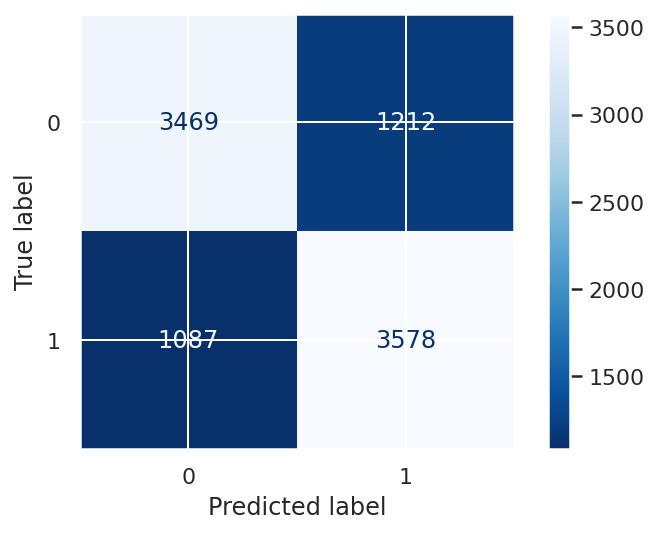

 
**************************
SVC(random_state=42)
Accuracy: 77.59%
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      4681
           1       0.79      0.75      0.77      4665

    accuracy                           0.78      9346
   macro avg       0.78      0.78      0.78      9346
weighted avg       0.78      0.78      0.78      9346



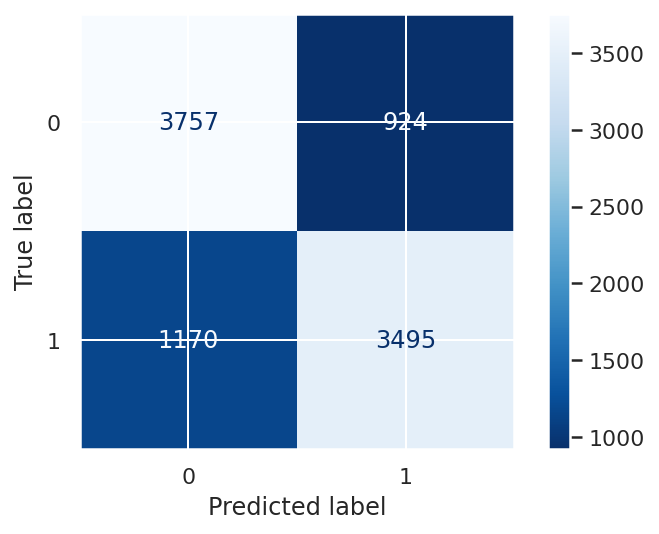

In [ ]:
model.base_model()

Fitting 3 folds for each of 14 candidates, totalling 42 fits
LogisticRegression(C=0.01)
{'C': 0.01, 'penalty': 'l2'}
The accuracy on train data is  0.7301107484885774
The accuracy on test data is  0.7327198801626364
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      4681
           1       0.73      0.74      0.73      4665

    accuracy                           0.73      9346
   macro avg       0.73      0.73      0.73      9346
weighted avg       0.73      0.73      0.73      9346



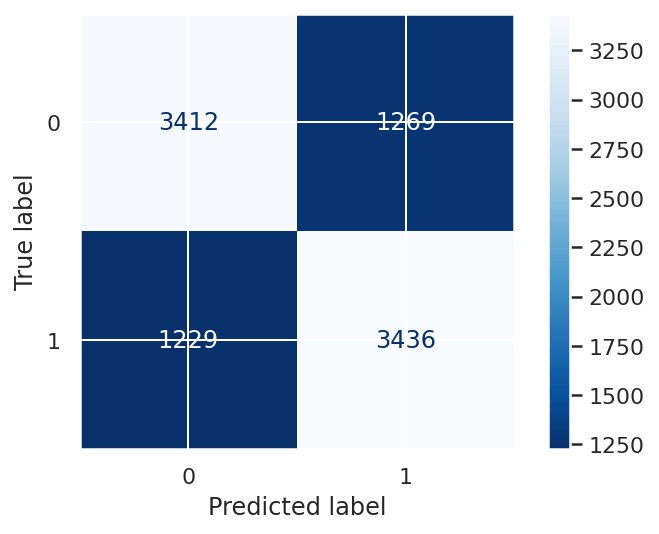

In [ ]:
 # GridSearchCV Logistic regression
 model.grid_LogisticRegression()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
RandomForestClassifier(max_depth=30, n_estimators=150)
{'max_depth': 30, 'n_estimators': 150}
The accuracy on train data is  0.9991439730351506
The accuracy on test data is  0.8450674085170127
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      4681
           1       0.86      0.82      0.84      4665

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.84      9346
weighted avg       0.85      0.85      0.84      9346



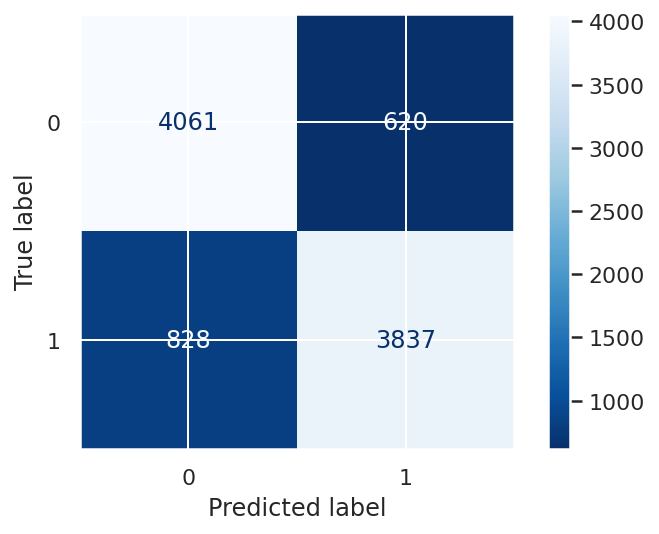

In [ ]:
 # GridSearchCV random forest classifier
 model.grid_randomforestregression()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
GradientBoostingClassifier(max_depth=10, n_estimators=200)
{'max_depth': 10, 'n_estimators': 200}
The accuracy on train data is  0.9959873736022685
The accuracy on test data is  0.8471003637919966
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      4681
           1       0.87      0.82      0.84      4665

    accuracy                           0.85      9346
   macro avg       0.85      0.85      0.85      9346
weighted avg       0.85      0.85      0.85      9346



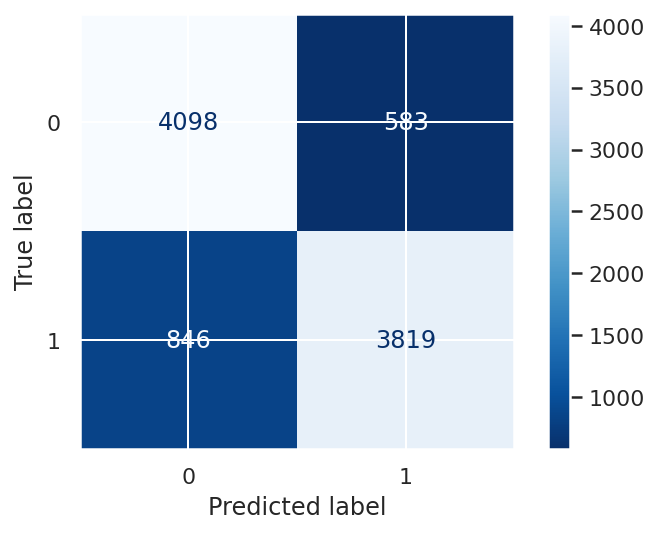

In [ ]:
# GridSearchCV gradient boosting classifier
model.grid_GradientBoostingClassifier()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
DecisionTreeClassifier(max_depth=9)
{'max_depth': 9, 'splitter': 'best'}
The accuracy on train data is  0.7893371141190948
The accuracy on test data is  0.7663171410228975
              precision    recall  f1-score   support

           0       0.74      0.81      0.78      4681
           1       0.79      0.72      0.75      4665

    accuracy                           0.77      9346
   macro avg       0.77      0.77      0.77      9346
weighted avg       0.77      0.77      0.77      9346



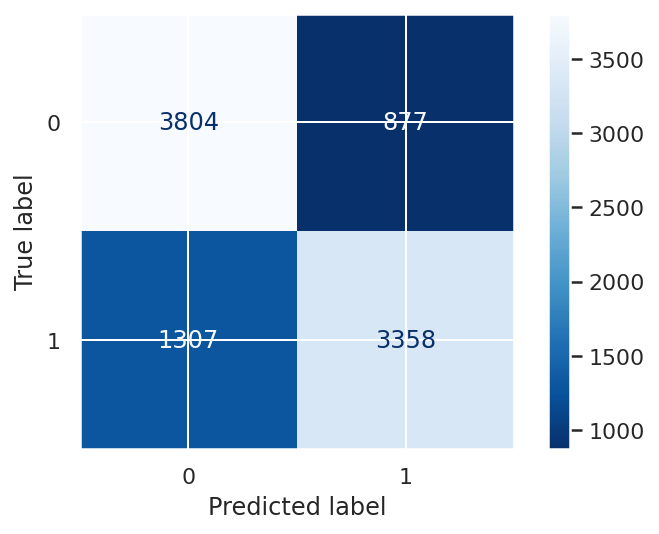

In [ ]:
 # GridSearchCV Decision tree clasiifier
 model.grid_DecisionTreeClassifier()

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 10, 'kernel': 'rbf'}
The accuracy on train data is  0.8094166666666667
The accuracy on test data is  0.8048333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4666
           1       0.67      0.24      0.35      1334

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.78      0.80      0.77      6000



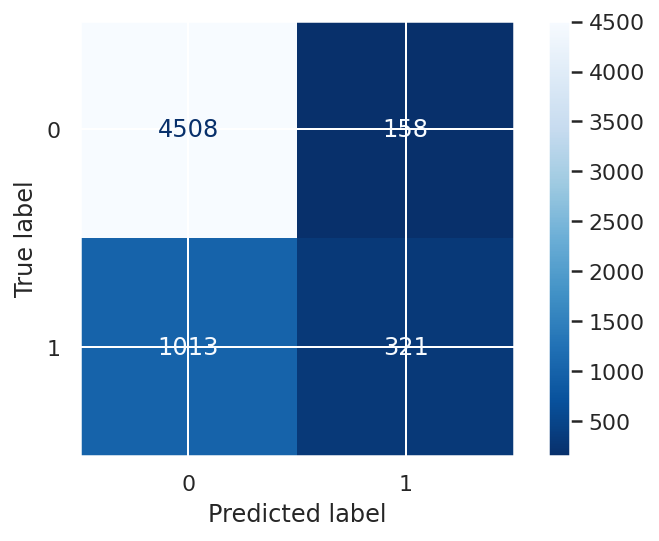

In [14]:
# GridSearchCV support Vector Classifier
model.grid_supportvectorclassifier()

*** from the above base models and gridserchcv models if we try to compare random forest classifier as better effiency in predicting default payment ***

In [ ]:
# feature importance with respect to random forest classifier 
optimized_rfc.feature_importances_

array([0.05720181, 0.03225607, 0.02600209, 0.03157291, 0.05324569,
       0.07351397, 0.06144093, 0.0319109 , 0.02833966, 0.02062161,
       0.02292956, 0.05549074, 0.04523989, 0.0426424 , 0.04145431,
       0.0402154 , 0.04028759, 0.05754287, 0.05245219, 0.0472611 ,
       0.04620044, 0.04520039, 0.0469775 ])

In [ ]:
importances = optimized_rfc.feature_importances_

importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
5,PAY_0,0.073514
6,PAY_2,0.061441
17,PAY_AMT1,0.057543
0,LIMIT_BAL,0.057202
11,BILL_AMT1,0.055491
4,AGE,0.053246
18,PAY_AMT2,0.052452
19,PAY_AMT3,0.047261
22,PAY_AMT6,0.046977
20,PAY_AMT4,0.046200


In [ ]:
optimized_gbc.feature_importances_

array([0.05939404, 0.04273364, 0.02819877, 0.03812398, 0.04419655,
       0.08156953, 0.15806154, 0.01682878, 0.01565421, 0.01146568,
       0.01436873, 0.06033312, 0.03281242, 0.02951862, 0.02847354,
       0.02833578, 0.03191375, 0.05750229, 0.05152084, 0.03844629,
       0.04050059, 0.04099197, 0.04905535])

In [ ]:
importances = optimized_gbc.feature_importances_

importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
6,PAY_2,0.158062
5,PAY_0,0.081570
11,BILL_AMT1,0.060333
0,LIMIT_BAL,0.059394
17,PAY_AMT1,0.057502
18,PAY_AMT2,0.051521
22,PAY_AMT6,0.049055
4,AGE,0.044197
1,SEX,0.042734
21,PAY_AMT5,0.040992


# SCENARIO 2: Data With EDA and outliers and correlation treatment

In [13]:
# data after removing outliers and multicolinearty
x=final.drop(['default payment next month'], axis=1)
y=final['default payment next month']

X_train, X_test, Y_train, Y_test = train_test_split( x,y , test_size = 0.2, random_state = 1000) 
print(X_train.shape)
print(X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

(24000, 9)
(6000, 9)


**************************
LogisticRegression(random_state=42)
Accuracy: 79.67%
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4666
           1       0.67      0.17      0.27      1334

    accuracy                           0.80      6000
   macro avg       0.74      0.57      0.58      6000
weighted avg       0.77      0.80      0.75      6000



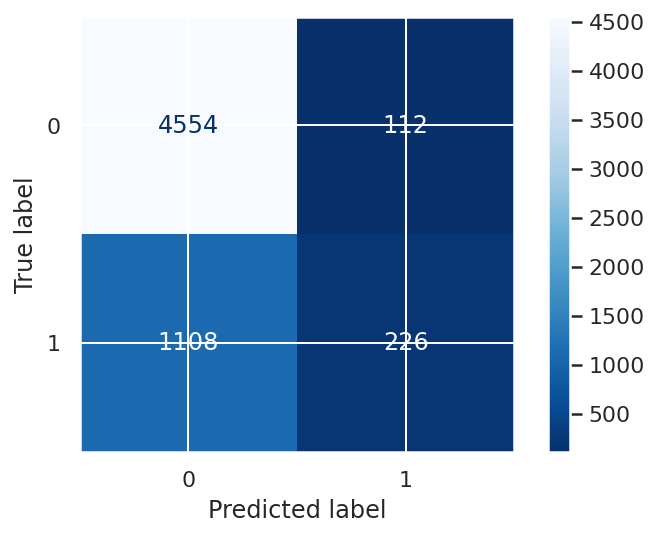

 
**************************
RandomForestClassifier(random_state=42)
Accuracy: 79.52%
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4666
           1       0.57      0.32      0.41      1334

    accuracy                           0.80      6000
   macro avg       0.70      0.62      0.64      6000
weighted avg       0.77      0.80      0.77      6000



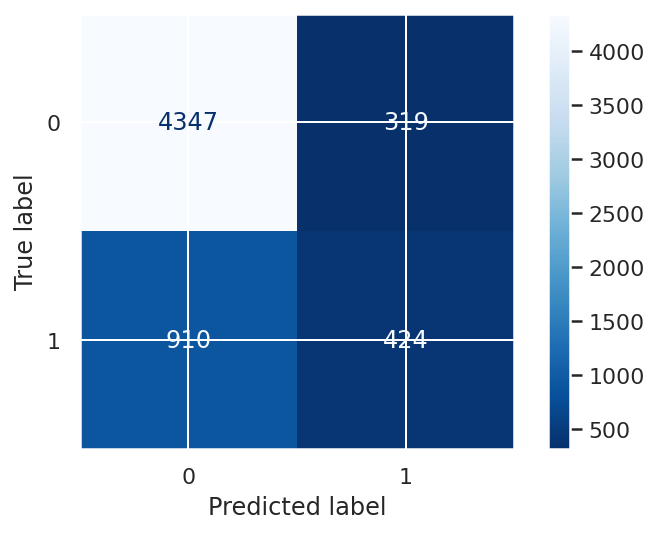

 
**************************
GradientBoostingClassifier(random_state=42)
Accuracy: 80.72%
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4666
           1       0.63      0.32      0.42      1334

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.79      0.81      0.78      6000



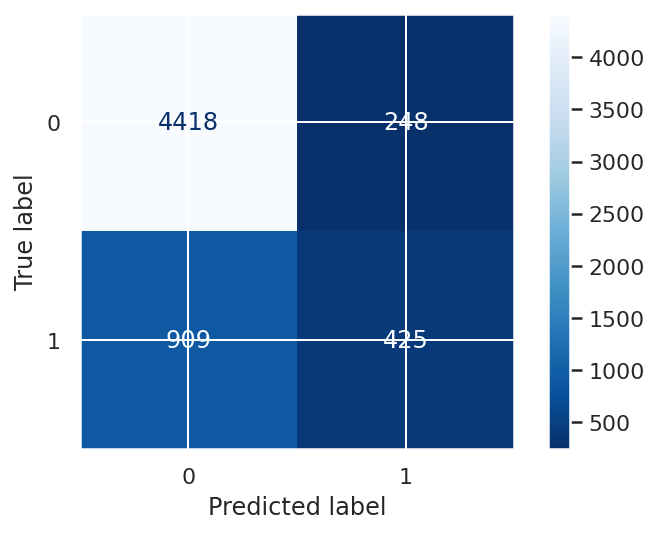

 
**************************
DecisionTreeClassifier(random_state=42)
Accuracy: 71.82%
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4666
           1       0.38      0.41      0.39      1334

    accuracy                           0.72      6000
   macro avg       0.60      0.61      0.61      6000
weighted avg       0.73      0.72      0.72      6000



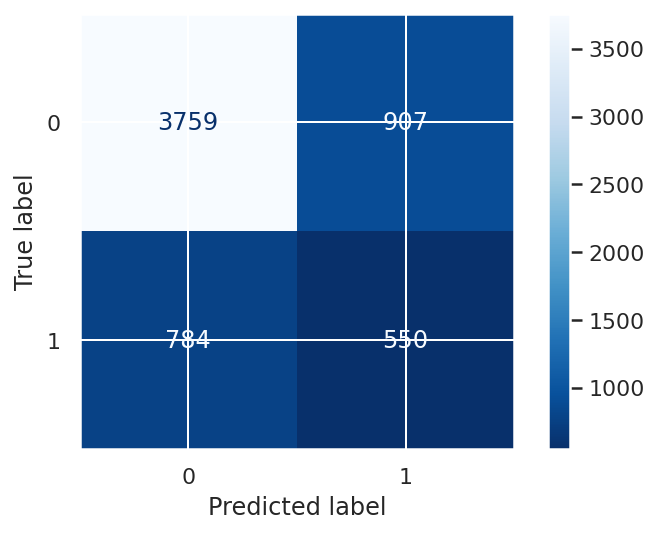

 
**************************
SVC(random_state=42)
Accuracy: 80.23%
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      4666
           1       0.67      0.22      0.33      1334

    accuracy                           0.80      6000
   macro avg       0.74      0.59      0.61      6000
weighted avg       0.78      0.80      0.76      6000



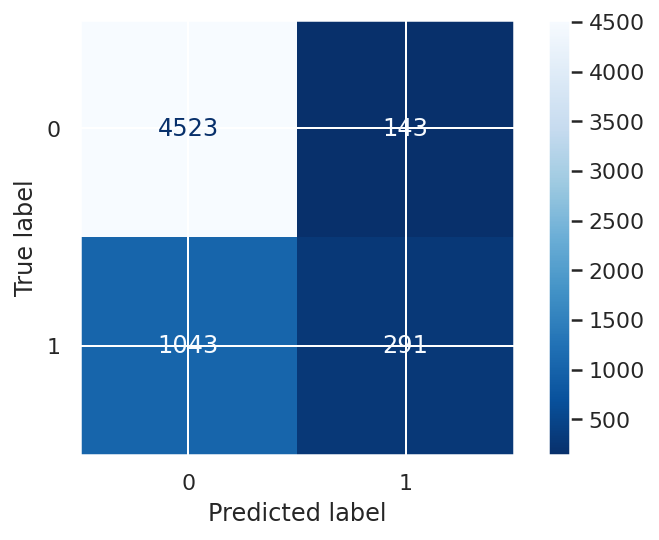

In [ ]:
model.base_model()

Fitting 3 folds for each of 14 candidates, totalling 42 fits
LogisticRegression(C=1)
{'C': 1, 'penalty': 'l2'}
The accuracy on train data is  0.7987083333333334
The accuracy on test data is  0.7966666666666666
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4666
           1       0.67      0.17      0.27      1334

    accuracy                           0.80      6000
   macro avg       0.74      0.57      0.58      6000
weighted avg       0.77      0.80      0.75      6000



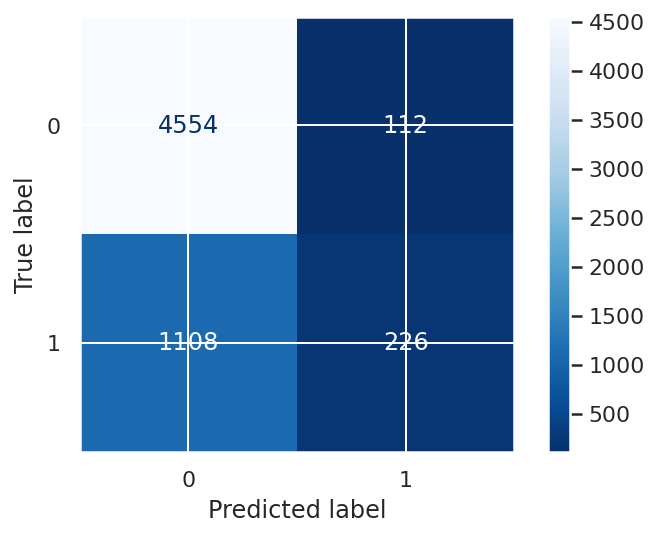

In [ ]:
 # GridSearchCV  Logistic regression
 model.grid_LogisticRegression()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
RandomForestClassifier(max_depth=10, n_estimators=200)
{'max_depth': 10, 'n_estimators': 200}
The accuracy on train data is  0.8398333333333333
The accuracy on test data is  0.8038333333333333
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4666
           1       0.61      0.32      0.42      1334

    accuracy                           0.80      6000
   macro avg       0.72      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



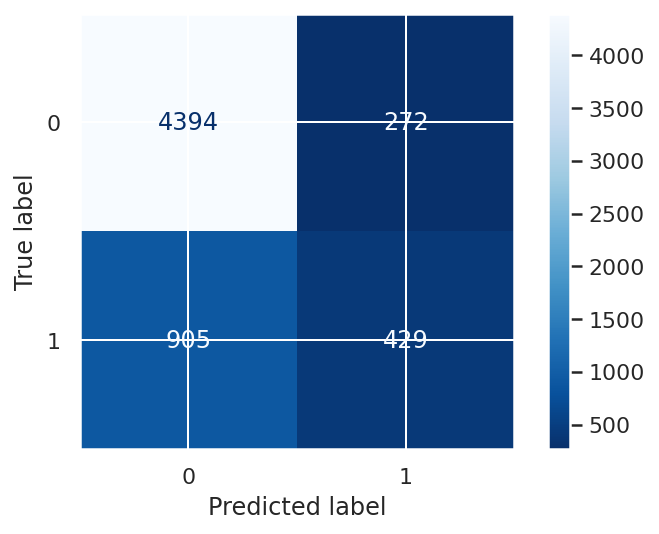

In [ ]:
 # GridSearchCV random forest classifier
 model.grid_randomforestregression()

Fitting 3 folds for each of 9 candidates, totalling 27 fits
GradientBoostingClassifier(max_depth=10)
{'max_depth': 10, 'n_estimators': 100}
The accuracy on train data is  0.9242916666666666
The accuracy on test data is  0.7978333333333333
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4666
           1       0.58      0.32      0.41      1334

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.77      0.80      0.77      6000



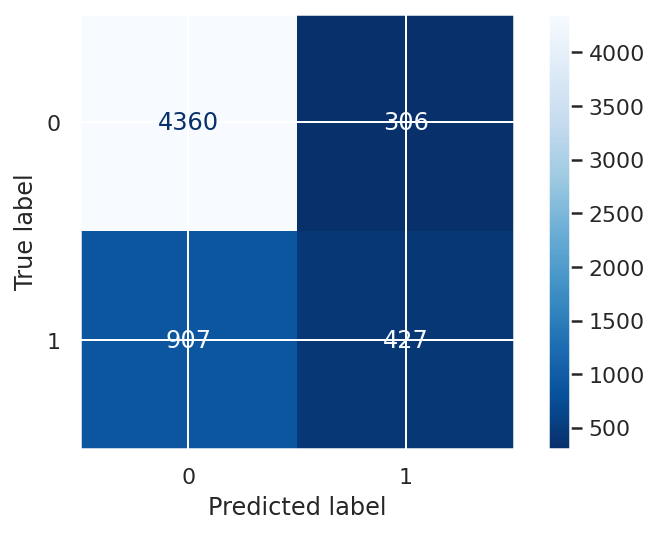

In [ ]:
# GridSearchCV gradient boosting classifier
model.grid_GradientBoostingClassifier()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
DecisionTreeClassifier(max_depth=3)
{'max_depth': 3, 'splitter': 'best'}
The accuracy on train data is  0.8069166666666666
The accuracy on test data is  0.8065
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      4666
           1       0.63      0.31      0.41      1334

    accuracy                           0.81      6000
   macro avg       0.73      0.63      0.65      6000
weighted avg       0.78      0.81      0.78      6000



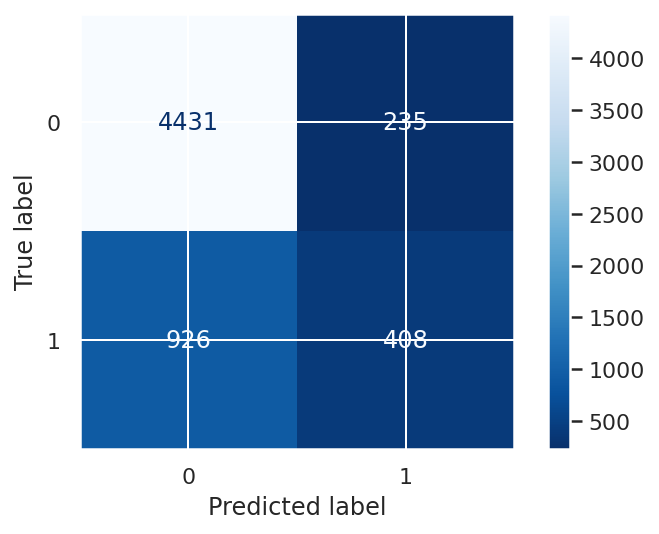

In [ ]:
 # GridSearchCV Decision tree clasiifier
model.grid_DecisionTreeClassifier()

Support Vector Classifier
Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 10, 'kernel': 'rbf'}
The accuracy on train data is  0.8094166666666667
The accuracy on test data is  0.8048333333333333
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4666
           1       0.67      0.24      0.35      1334

    accuracy                           0.80      6000
   macro avg       0.74      0.60      0.62      6000
weighted avg       0.78      0.80      0.77      6000



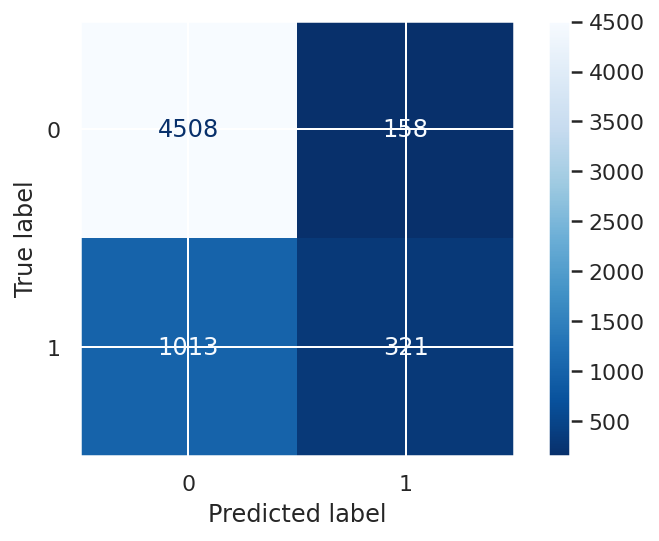

*******************
 


In [ ]:
# GridSearchCV support Vector Classifier
model.grid_supportvectorclassifier()

In [ ]:
#feature importance of decision tree classifier 
optimized_dtc.feature_importances_

array([0.        , 0.91303244, 0.00202293, 0.08494463, 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
importances = optimized_dtc.feature_importances_

importance_dict = {'Feature' : list(x.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
1,TOTAL_PAY,0.913032
3,TOTAL_PAY_AMT1,0.084945
2,TOTAL_BILL_AMT1,0.002023
0,LIMIT_BAL,0.000000
4,SEX,0.000000
5,AGE,0.000000
6,LIMIT_BAL,0.000000
7,EDUCATION,0.000000
8,MARRIAGE,0.000000
